In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline
sns.set()

In [8]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [9]:
pd.set_option('display.max_colwidth',2000)
pd.reset_option('display.max_colwidth')

# PINIR Website: Data Analysis

In [7]:
# Organism : Scientific Name (Common Name)(Synonym)
# Example  : Erythranthe guttata (Yellow monkey flower) (Mimulus guttatus)

# Species  : Scientific Name
# Example  : Erythranthe guttata
# Genus    : Erythranthe
    
# Plant    : Scientific Name (Common Name)(Synonym)
# Example  : Erythranthe guttata (Yellow monkey flower) (Mimulus guttatus)


## (1) PIs Data Analysis

In [7]:
# Here we perform different analysis on Pin-II PI sequences

### (1.1) Species Distribution (PIs distribution across species)

In [ ]:
# Species Distribution shows us the distribution of Pin-II PIs in various species.
# For this from tables PI_General_Features and Taxonomy, the relation between PI's and their Species can be retrived. From
# this relation we can calculate how many PI's belong to one particular specie

In [10]:
pi_features=pd.read_csv('19_Sequence_Organism_IsoelectricPoint_Amino_Composition.csv')

In [9]:
pi_features.columns

Index(['UniprotID', 'Protein names', 'GeneNames', 'OrganismID', 'Organism',
       'Genus', 'Species', 'Solanaceae', 'Function [CC]', 'Sequence', 'Length',
       'Mass', 'average_pI', 'pH_5.5_charge', 'pH_7.4_charge', 'pH_8.0_charge',
       'A', 'A_per', 'C', 'C_per', 'D', 'D_per', 'E', 'E_per', 'F', 'F_per',
       'G', 'G_per', 'H', 'H_per', 'I', 'I_per', 'K', 'K_per', 'L', 'L_per',
       'M', 'M_per', 'N', 'N_per', 'O', 'O_per', 'P', 'P_per', 'Q', 'Q_per',
       'R', 'R_per', 'S', 'S_per', 'T', 'T_per', 'U', 'U_per', 'V', 'V_per',
       'W', 'W_per', 'X', 'X_per', 'Y', 'Y_per', 'Z', 'Z_per'],
      dtype='object')

In [10]:
pi_taxonID=pi_features[['UniprotID','OrganismID']]

In [11]:
pi_taxonID.count()

UniprotID     415
OrganismID    415
dtype: int64

In [11]:
taxonomy=pd.read_csv('5(b)_Taxonomy_Used.csv')

In [14]:
taxonomy.columns

Index(['Taxon', 'Mnemonic', 'Scientific name', 'Common name', 'Synonym',
       'Other Names', 'Reviewed', 'Rank', 'Lineage', 'Parent', 'Virus hosts',
       'Organism', 'Genus', 'Species', 'Solanaceae'],
      dtype='object')

In [12]:
taxonomy=taxonomy[['Taxon','Scientific name', 'Common name','Organism', 'Genus','Solanaceae']]

In [17]:
taxonomy

Taxon                         Scientific name  \
0      52838                         Musa balbisiana   
1      38414                      Eragrostis curvula   
2      15368                 Brachypodium distachyon   
3    1088818                   Apostasia shenzhenica   
4     906689                    Dendrobium catenatum   
5     542762         Camellia sinensis var. sinensis   
6      33113                       Atropa belladonna   
7       4081                    Solanum lycopersicum   
8       4072                         Capsicum annuum   
9      33114                       Capsicum baccatum   
10      4108                       Solanum chacoense   
11      4093                       Nicotiana rustica   
12      4096                    Nicotiana sylvestris   
13     80379                       Capsicum chinense   
14      4111                       Solanum melongena   
15      4097                       Nicotiana tabacum   
16      4100                   Nicotiana benthamiana   
17      4112                          Solanum nigrum   
18     35889                     Nicotiana glutinosa   
19     49451                     Nicotiana attenuata   
20      4113                       Solanum tuberosum   
21     76336                       Nicotiana repanda   
22     81866                   Nicotiana clevelandii   
23    118690                      Nicotiana cavicola   
24    118701                      Nicotiana linearis   
25    118703                  Nicotiana megalosiphon   
26    118704                       Nicotiana miersii   
27    118709                      Nicotiana simulans   
28    118712                     Nicotiana umbratica   
29    109975                      Solanum americanum   
30    200300                   Nicotiana spegazzinii   
31    200301                     Nicotiana corymbosa   
32    200306  Nicotiana occidentalis subsp. hesperis   
33    200315                    Nicotiana pauciflora   
34    200316                   Nicotiana obtusifolia   
35    172790                         Solanum phureja   
36    278839                  Nicotiana quadrivalvis   
37      4086                     Nicotiana acuminata   
38      4087                         Nicotiana alata   
39      4146                           Olea europaea   
40    429701              Handroanthus impetiginosus   
41    192259                          Genlisea aurea   
42     28930                         Fagus sylvatica   
43     51240                           Juglans regia   
44      3694                     Populus trichocarpa   
45      3988                        Ricinus communis   
46     43335                            Populus alba   
47      3983                       Manihot esculenta   
48    180498                         Jatropha curcas   
49      3476                   Parasponia andersonii   
50     63057                         Trema orientale   
51    981085                         Morus notabilis   
52      3755                           Prunus dulcis   
53      3760                          Prunus persica   
54     74649                          Rosa chinensis   
55      3702                    Arabidopsis thaliana   
56     81972        Arabidopsis lyrata subsp. lyrata   
57     81985                        Capsella rubella   
58      3711                     Brassica campestris   
59     51351         Brassica rapa subsp. pekinensis   
60      3712                       Brassica oleracea   
61    109376         Brassica oleracea var. oleracea   
62     69181                        Brassica cretica   
63    107243                    Noccaea caerulescens   
64     22663                         Punica granatum   
65      4155                     Erythranthe guttata   
66     88036              Selaginella moellendorffii   
67      4529                         Oryza rufipogon   
68      4536                            Oryza nivara   
69     39946              Oryza sativa subsp. indica   
70     39947            Oryza s

In [18]:
pi_taxonomy=pd.merge(pi_taxonID,taaxonomy,left_on='OrganismID',right_on='Taxon',how='left')

In [21]:
pi_taxonomy.UniprotID.count()

415

In [22]:
pi_taxonomy.columns

Index(['UniprotID', 'OrganismID', 'Taxon', 'Scientific name', 'Common name',
       'Organism', 'Genus', 'Solanaceae'],
      dtype='object')

In [23]:
pi_taxonomy.head(2)

UniprotID  OrganismID  Taxon       Scientific name Common name  \
0    P05119        4081   4081  Solanum lycopersicum      Tomato   
1    P84813        4113   4113     Solanum tuberosum      Potato   

                                            Organism    Genus  Solanaceae  
0  Solanum lycopersicum (Tomato) (Lycopersicon es...  Solanum           1  
1                         Solanum tuberosum (Potato)  Solanum           1

In [26]:
pi_species=pi_taxonomy[['UniprotID','Scientific name','Solanaceae']]

In [27]:
pi_species

UniprotID                         Scientific name  Solanaceae
0        P05119                    Solanum lycopersicum           1
1        P84813                       Solanum tuberosum           1
2        P01080                       Solanum tuberosum           1
3        P01078                       Solanum melongena           1
4        P83241                         Capsicum annuum           1
5        Q41435                       Solanum tuberosum           1
6        P56615                         Capsicum annuum           1
7        Q43710                    Solanum lycopersicum           1
8        Q43502                    Solanum lycopersicum           1
9        Q40561                       Nicotiana tabacum           1
10       Q43652                       Solanum tuberosum           1
11       Q00782                       Solanum tuberosum           1
12       Q41489                       Solanum tuberosum           1
13       Q41488                       Solanum tuberosum           1
14       O49146                         Capsicum annuum           1
15       P01079                       Solanum tuberosum           1
16   A0A4U5Q9H5                            Populus alba           0
17   A0A4P1QQM0                   Lupinus angustifolius           0
18   A0A4S4ET36         Camellia sinensis var. sinensis           0
19   A0A1S3YTB5                       Nicotiana tabacum           1
20       Q9C7G9                    Arabidopsis thaliana           0
21   A0A3Q7IU74                    Solanum lycopersicum           1
22   A0A1E5W186              Dichanthelium oligosanthes           0
23       A3FMA3                                Zea mays           0
24   A0A2N9F3Z0                         Fagus sylvatica           0
25   A0A0D3APY5         Brassica oleracea var. oleracea           0
26       A7TUH6                     Nicotiana attenuata           1
27       Q4ZIQ5                         Capsicum annuum           1
28   A0A2T7C1D7              Panicum hallii var. hallii           0
29   A0A068UQ46                        Coffea canephora           0
30   A0A1B6Q2N4                         Sorghum bicolor           0
31   A0A2G2X8V0                       Capsicum baccatum           1
32       C5WLW2                         Sorghum bicolor           0
33   A0A3B6GR13                       Triticum aestivum           0
34   A0A2G2V3L6                       Capsicum baccatum           1
35   A0A0K9S2T0                       Spinacia oleracea           0
36   A0A2G2WX27                       Capsicum baccatum           1
37       C5XFQ3                         Sorghum bicolor           0
38   A0A2G9H7E3              Handroanthus impetiginosus           0
39   A0A2G2WDG3                       Capsicum baccatum           1
40   A0A2G9G784              Handroanthus impetiginosus           0
41   A0A2G3A0U2                         Capsicum annuum           1
42   A0A097J9D5                         Capsicum annuum           1
43   A0A097J9C5                         Capsicum annuum           1
44   A0A1U7Y2F0                    Nicotiana sylvestris           1
45   A0A1U7XB93                    Nicotiana sylvestris           1
46   A0A2G3C8B9                       Capsicum chinense           1
47       W9RZD9                         Morus notabilis           0
48       Q1WL44                    Nicotiana sylvestris           1
49   A0A2G3AW40                       Capsicum chinense           1
50       Q1WL39                    Nicotiana pauciflora           1
51   A0A2G3C896                       Capsicum chinense           1
52   A0A2G3C7I2                       Capsicum chinense           1
53   A0A2G3AT14                       Capsicum chinense           1
54   A0A1U7VLC3                    Nicotiana sylvestris           1
55   A0A2G3C7G8                       Capsicum chinense           1
56   A0A1J3HRR4                    Noccaea caerulescens           0
57   A0A2G3AW51                       Capsicum chinense       

In [ ]:
# Now we will group the number of PIs, Species (Scientific name) wise and within each species how many our Solanaceae and 
# non-Solanaceae

In [28]:
pi_species.groupby('Scientific name').Solanaceae.value_counts()

Scientific name                         Solanaceae
Aegilops tauschii                       0              1
Aegilops tauschii subsp. strangulata    0              2
Ananas comosus                          0              3
Apostasia shenzhenica                   0              1
Arabidopsis lyrata subsp. lyrata        0              1
Arabidopsis thaliana                    0              2
Arachis hypogaea                        0              4
Atropa belladonna                       1              1
Brachypodium distachyon                 0              2
Brassica campestris                     0              1
Brassica cretica                        0              1
Brassica oleracea                       0              1
Brassica oleracea var. oleracea         0              1
Brassica rapa subsp. pekinensis         0              1
Camellia sinensis var. sinensis         0              1
Capsella rubella                        0              1
Capsicum annuum                      

In [30]:
#pi_species.groupby('Scientific name').Solanaceae.value_counts().to_csv('Website/G1(1)_SpeciesDistribution.csv')

In [38]:
species_distribution=pd.read_csv('Website/G1(1)_SpeciesDistribution.csv')

In [39]:
#species_distribution

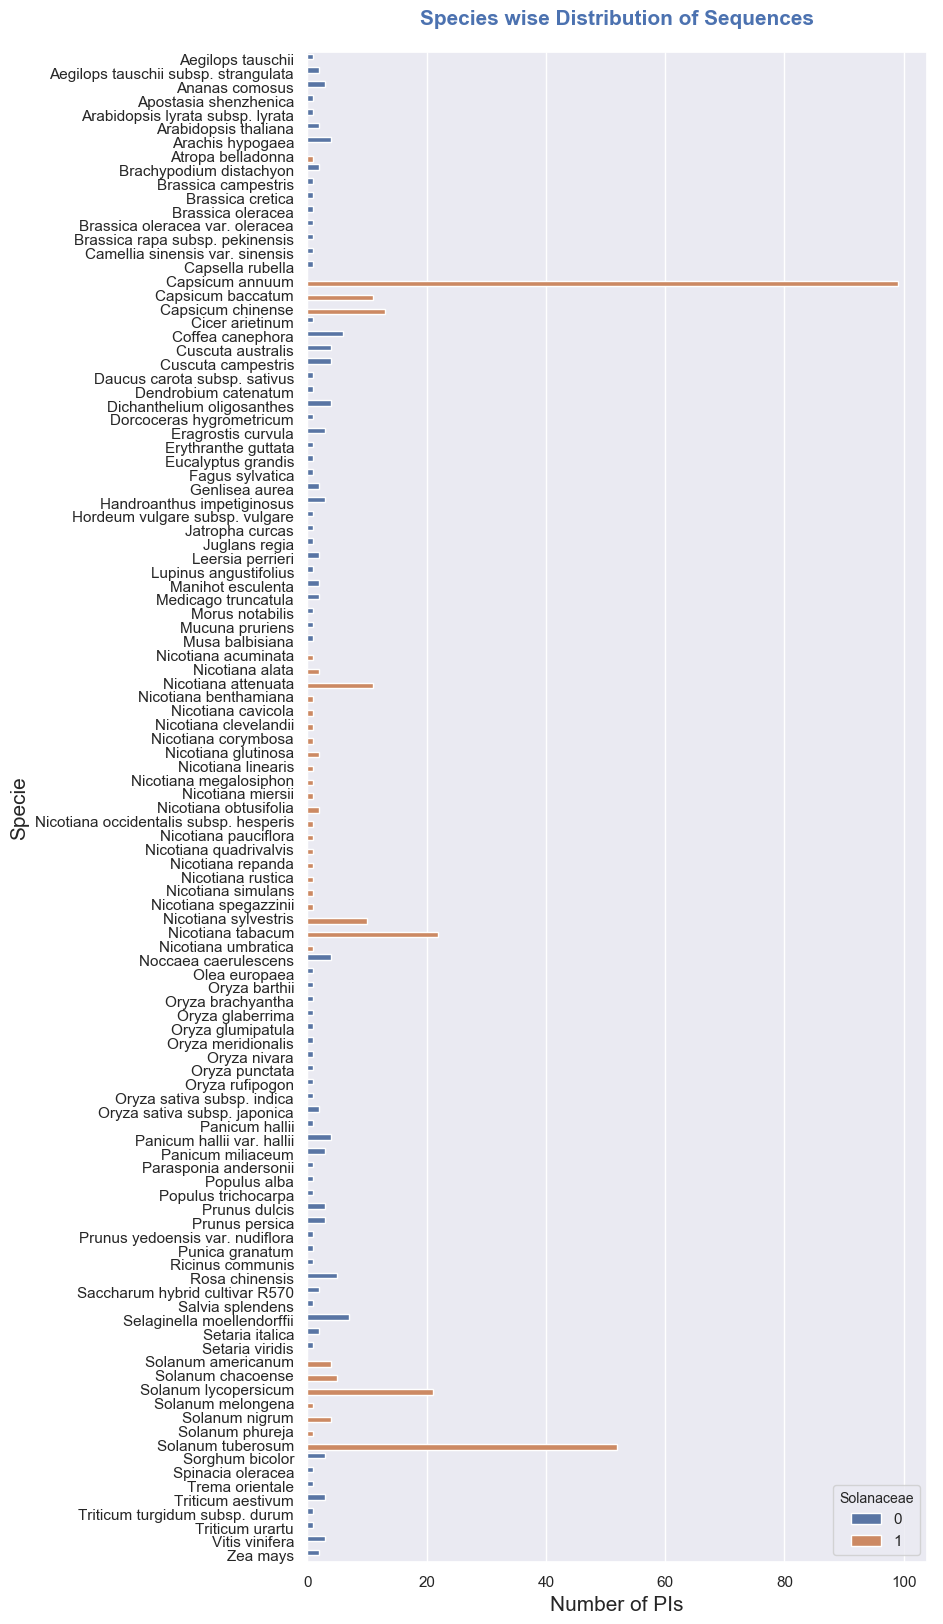

In [42]:
plt.figure(figsize=(8,20),dpi=100)
plt.title('Species wise Distribution of Sequences',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of Sequences',fontdict={'fontsize':15})
plt.ylabel('Specie',fontdict={'fontsize':15})
g=sns.barplot(x='Number of PIs',y='Specie',hue='Solanaceae',data=species_distribution)
#g.legend_.remove()

### (1.2) Genus Distribution (PIs distribution across genus)

In [45]:
# Genus Distribution shows us the distribution of Pin-II PIs in various Genus.
# For this from tables PI_General_Features and Taxonomy, the relation between PI's and their Genus can be retrieved. From
# this relation we can calculate how many PI's belong to one particular Genus

In [47]:
pi_genus=pi_taxonomy[['UniprotID','Genus','Solanaceae']]

In [50]:
#pi_genus.groupby('Genus').Solanaceae.value_counts().to_csv('Website/G1(2)_GenusDistribution.csv')

In [61]:
genus_distribution=pd.read_csv('Website/G1(2)_GenusDistribution.csv')

In [62]:
genus_distribution.head()

Genus  Solanaceae  Number of PIs
0     Aegilops           0              3
1       Ananas           0              3
2    Apostasia           0              1
3  Arabidopsis           0              3
4      Arachis           0              4

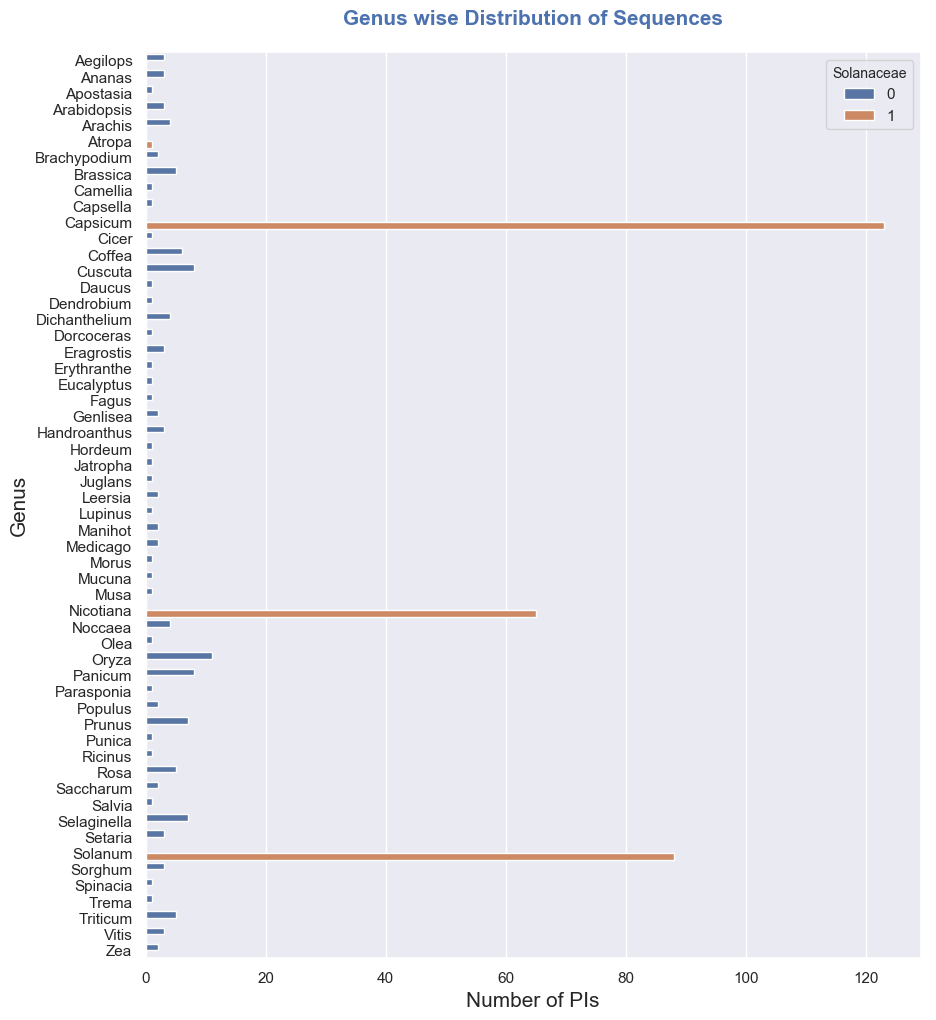

In [64]:
plt.figure(figsize=(10,12),dpi=100)
plt.title('Genus wise Distribution of Sequences',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of Sequences',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})
g=sns.barplot(x='Number of PIs',y='Genus',hue='Solanaceae',data=genus_distribution)
#g.legend_.remove()

### (1.3) Cysteine content Distribution

In [65]:
# It shows how many PIs have a particular number of Cysteine in their sequences. The informtion can be retrieved from the
# sequence amino composition table

In [66]:
seq_amino_comp=pd.read_csv('17_Sequence_Amino_Composition.csv')

In [67]:
seq_cys_comp=seq_amino_comp[['UniprotID','C','C_per' ]]

In [68]:
seq_cys_comp.count()

UniprotID    415
C            415
C_per        415
dtype: int64

In [69]:
cysCountInSequences=seq_cys_comp.C.value_counts()

In [72]:
#cysCountInSequences.to_csv('Website/G1(3)_CysteineCountInSequences.csv')

In [78]:
cysCountInSequences=pd.read_csv('Website/G1(3)_CysteineCountInSequences.csv')

In [79]:
cysCountInSequences

Cysteine Count  Number of PIs
0                9             81
1                8             79
2               25             45
3               24             37
4               16             36
5               10             19
6               17             18
7               48             16
8               14             10
9               33             10
10              11              9
11              40              6
12              15              5
13              32              5
14               7              4
15              56              4
16              22              4
17              26              3
18              13              3
19              12              3
20              38              2
21              50              2
22              63              2
23               6              1
24               4              1
25              88              1
26              18              1
27              19              1
28              21              1
29              64              1
30              23              1
31              34              1
32              42              1
33              45              1
34               3              1

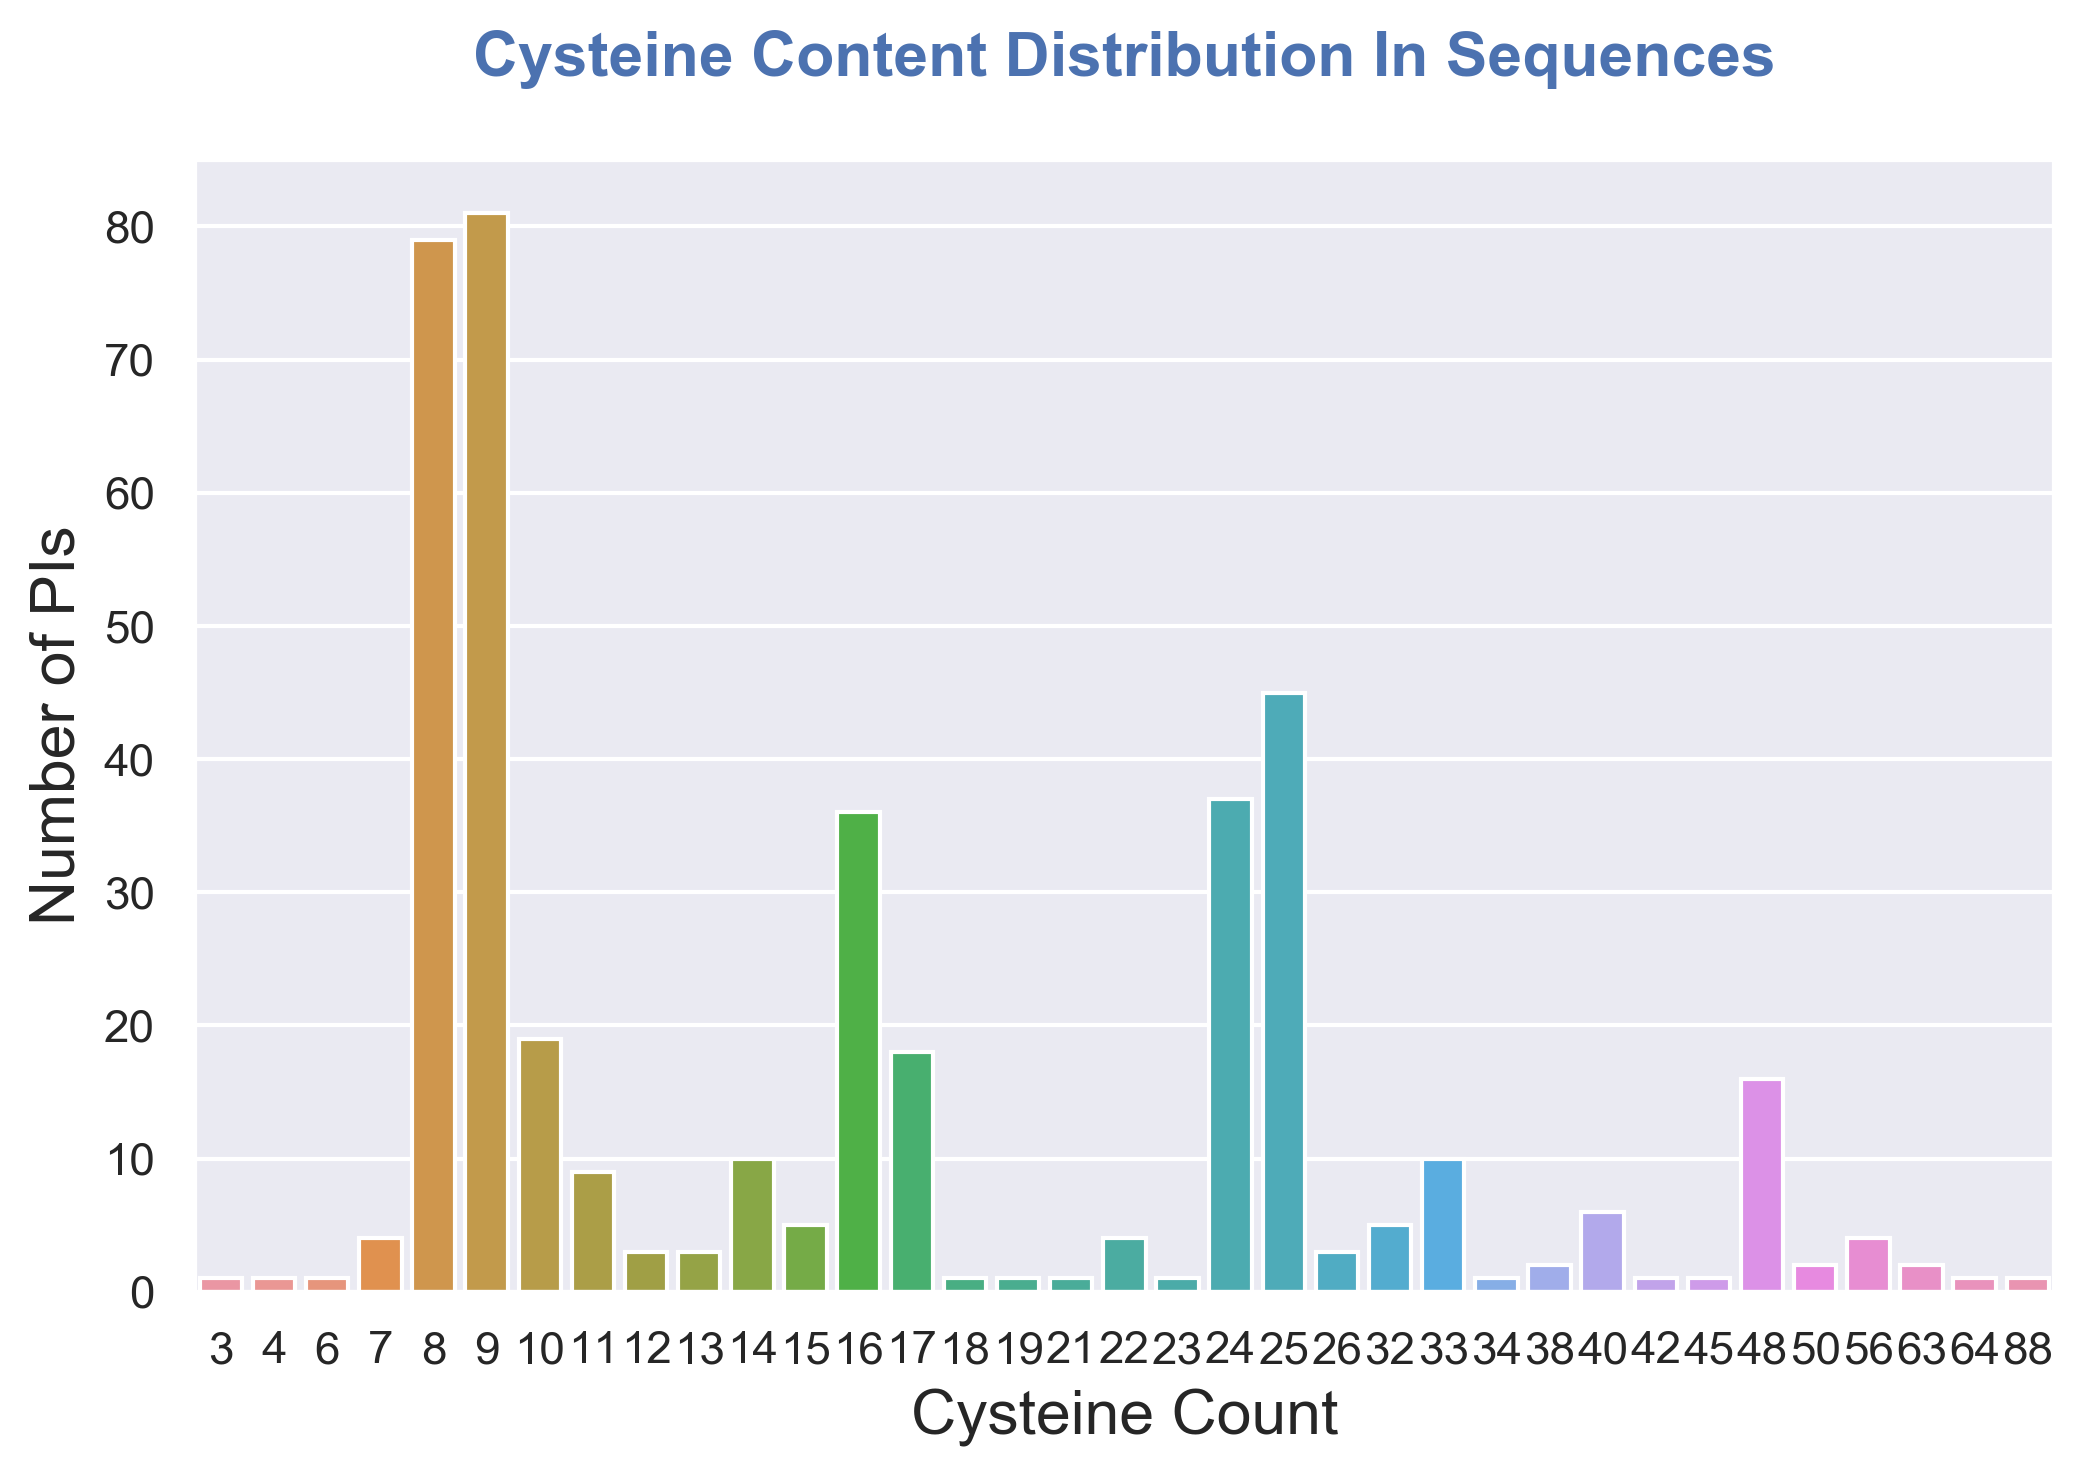

In [80]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Cysteine Content Distribution In Sequences',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Cysteine Count',fontdict={'fontsize':15})
plt.ylabel('Number of Sequences',fontdict={'fontsize':15})
sns.barplot(x='Cysteine Count',y='Number of PIs',data=cysCountInSequences)

### (1.3) Amino Acid Composition

In [81]:
# To show the distribution of Amino Acids in the composition of PIs sequences. We find the avearge of percentage of Amino Acid
# in each sequence.

In [82]:
seq_amino_comp.columns

Index(['Unnamed: 0', 'UniprotID', 'Sequence', 'Length', 'A', 'A_per', 'C',
       'C_per', 'D', 'D_per', 'E', 'E_per', 'F', 'F_per', 'G', 'G_per', 'H',
       'H_per', 'I', 'I_per', 'K', 'K_per', 'L', 'L_per', 'M', 'M_per', 'N',
       'N_per', 'O', 'O_per', 'P', 'P_per', 'Q', 'Q_per', 'R', 'R_per', 'S',
       'S_per', 'T', 'T_per', 'U', 'U_per', 'V', 'V_per', 'W', 'W_per', 'X',
       'X_per', 'Y', 'Y_per', 'Z', 'Z_per'],
      dtype='object')

In [83]:
seq_amino_percentage=seq_amino_comp[['A_per','C_per','D_per','E_per','F_per','G_per','H_per','I_per','K_per','L_per','M_per',
       'N_per','O_per','P_per','Q_per','R_per','S_per','T_per','U_per','V_per','W_per','X_per','Y_per','Z_per']]

In [84]:
seq_amino_percentage

A_per      C_per      D_per      E_per      F_per      G_per  \
0     4.729730  10.810811   3.378378   5.405405   5.405405  10.810811   
1    12.765957  14.893617   6.382979   2.127660   2.127660   8.510638   
2     7.189542  10.457516   3.921569   5.882353   3.267974  10.457516   
3     5.769231  15.384615   3.846154   5.769231   3.846154  11.538462   
4     7.692308  15.384615   3.846154   1.923077   1.923077   7.692308   
5     4.761905  10.884354   3.401361   5.442177   4.081633  11.564626   
6     7.272727  14.545455   5.454545   5.454545   1.818182   9.090909   
7     4.932735  10.762332   7.174888   8.968610   3.587444   8.968610   
8     4.975124  11.940299   2.985075   6.467662   1.990050  11.442786   
9     6.091371  12.182741   6.091371   6.091371   4.060914  10.152284   
10    3.896104  10.389610   3.246753   6.493506   4.545455  10.389610   
11    6.329114  11.392405   3.164557   6.329114   3.164557  10.126582   
12    4.761905  10.884354   2.721088   6.122449   4.761905  11.564626   
13    7.792208  10.389610   2.597403   7.142857   3.246753  10.389610   
14    7.843137  12.254902   4.901961   6.372549   2.941176   6.862745   
15    7.843137  15.686275   3.921569   3.921569   1.960784   7.843137   
16    6.430155   2.660754   4.212860   4.656319   5.099778   6.651885   
17    9.202454   9.815951   4.294479   3.067485   3.067485   6.134969   
18    7.000000   4.000000   6.166667   5.000000   4.666667   5.666667   
19    5.625000   6.250000   4.375000   5.000000   3.125000   8.750000   
20    7.407407   9.876543   2.469136   1.234568   1.234568   6.172840   
21    6.024096   9.156627   4.819277   6.265060   4.337349   7.951807   
22    9.523810   7.936508   2.380952   4.761905   0.000000   6.349206   
23    8.974359  11.538462   5.128205   1.282051   2.564103   8.974359   
24    7.364577   2.312842   5.112599   4.869142   4.503956   8.094948   
25    7.407407   9.876543   2.469136   3.703704   0.000000   4.938272   
26   12.765957   6.382979   4.255319   4.255319   4.255319   4.255319   
27    7.633588  12.595420   4.961832   6.488550   2.671756   7.251908   
28    9.230769  13.846154   3.076923   6.153846   0.000000   7.692308   
29    6.493506  11.688312   2.597403   5.194805   0.000000   6.493506   
30    8.641975  11.111111   2.469136   3.703704   1.234568   7.407407   
31    9.268293  12.195122   4.878049   7.317073   2.439024   7.317073   
32    8.791209  10.989011   4.395604   5.494505   0.000000   7.692308   
33    8.974359  14.102564   1.282051   5.128205   1.282051   8.974359   
34    6.532663  12.060302   3.517588   7.035176   2.512563  12.060302   
35    6.521739   8.695652  11.956522   2.173913   3.260870   7.608696   
36    4.819277   9.638554   3.614458   4.819277   4.819277   7.228916   
37    9.090909  11.688312   2.597403   3.896104   1.298701   9.090909   
38    7.792208  11.688312   2.597403   1.298701   2.597403   5.194805   
39    4.938272  11.111111   1.234568   2.469136   1.234568   9.876543   
40    6.493506  10.389610   2.597403   1.298701   2.597403  10.389610   
41    9.756098  12.195122   4.878049   7.804878   2.439024   6.341463   
42    5.524862  13.259669   3.867403   7.182320   2.209945  12.707182   
43    8.854167  13.020833   5.208333   7.812500   1.562500   7.291667   
44    6.682028  12.903226   6.451613   5.529954   4.608295   7.603687   
45    6.091371  12.182741   6.091371   6.091371   4.568528  10.152284   
46    8.641975   9.876543   2.469136   2.469136   2.469136   6.172840   
47    6.837607   9.401709   1.709402   5.128205   1.709402   5.982906   
48    6.045340  12.090680   7.808564   7.304786   3.274559   8.060453   
49    5.000000  12.500000   4.000000   4.500000   3.500000  10.500000   
50    5.793451  12.090680   7.304786   7.808564   3.778338   8.564232   
51    6.250000   7.812500   7.031250   3.125000   5.468750   7.812500   
52    5.952381  10.714286   4.761905   5.952381   4.761905   9.523810   
53    7.251908  12.595420   4.961832   6.488550   3.053435   7.2519

In [85]:
seq_amino_percentage.agg([np.mean],axis=0).transpose()

mean
A_per   7.271799
C_per  11.103981
D_per   4.250255
E_per   5.411589
F_per   2.872442
G_per   8.326324
H_per   1.232537
I_per   5.006288
K_per   6.090832
L_per   7.601607
M_per   2.221118
N_per   5.938412
O_per   0.000000
P_per   5.734925
Q_per   1.826664
R_per   3.650611
S_per   6.866841
T_per   5.488154
U_per   0.000000
V_per   4.643647
W_per   0.160664
X_per   0.003085
Y_per   4.298225
Z_per   0.000000

In [86]:
#seq_amino_percentage.agg([np.mean],axis=0).transpose().to_csv('Website/G1(4)Average_aa_percentageDistribution.csv')

In [89]:
seq_amino_avgPercentage=pd.read_csv('Website/G1(4)_Average_aa_percentageDistribution.csv')

In [90]:
seq_amino_avgPercentage

Amino Acid  Average Percentage
0           A            7.271799
1           C           11.103981
2           D            4.250255
3           E            5.411589
4           F            2.872442
5           G            8.326324
6           H            1.232537
7           I            5.006288
8           K            6.090832
9           L            7.601607
10          M            2.221118
11          N            5.938412
12          P            5.734925
13          Q            1.826664
14          R            3.650611
15          S            6.866841
16          T            5.488154
17          U            0.000000
18          V            4.643647
19          W            0.160664
20          X            0.003085
21          Y            4.298225
22          Z            0.000000

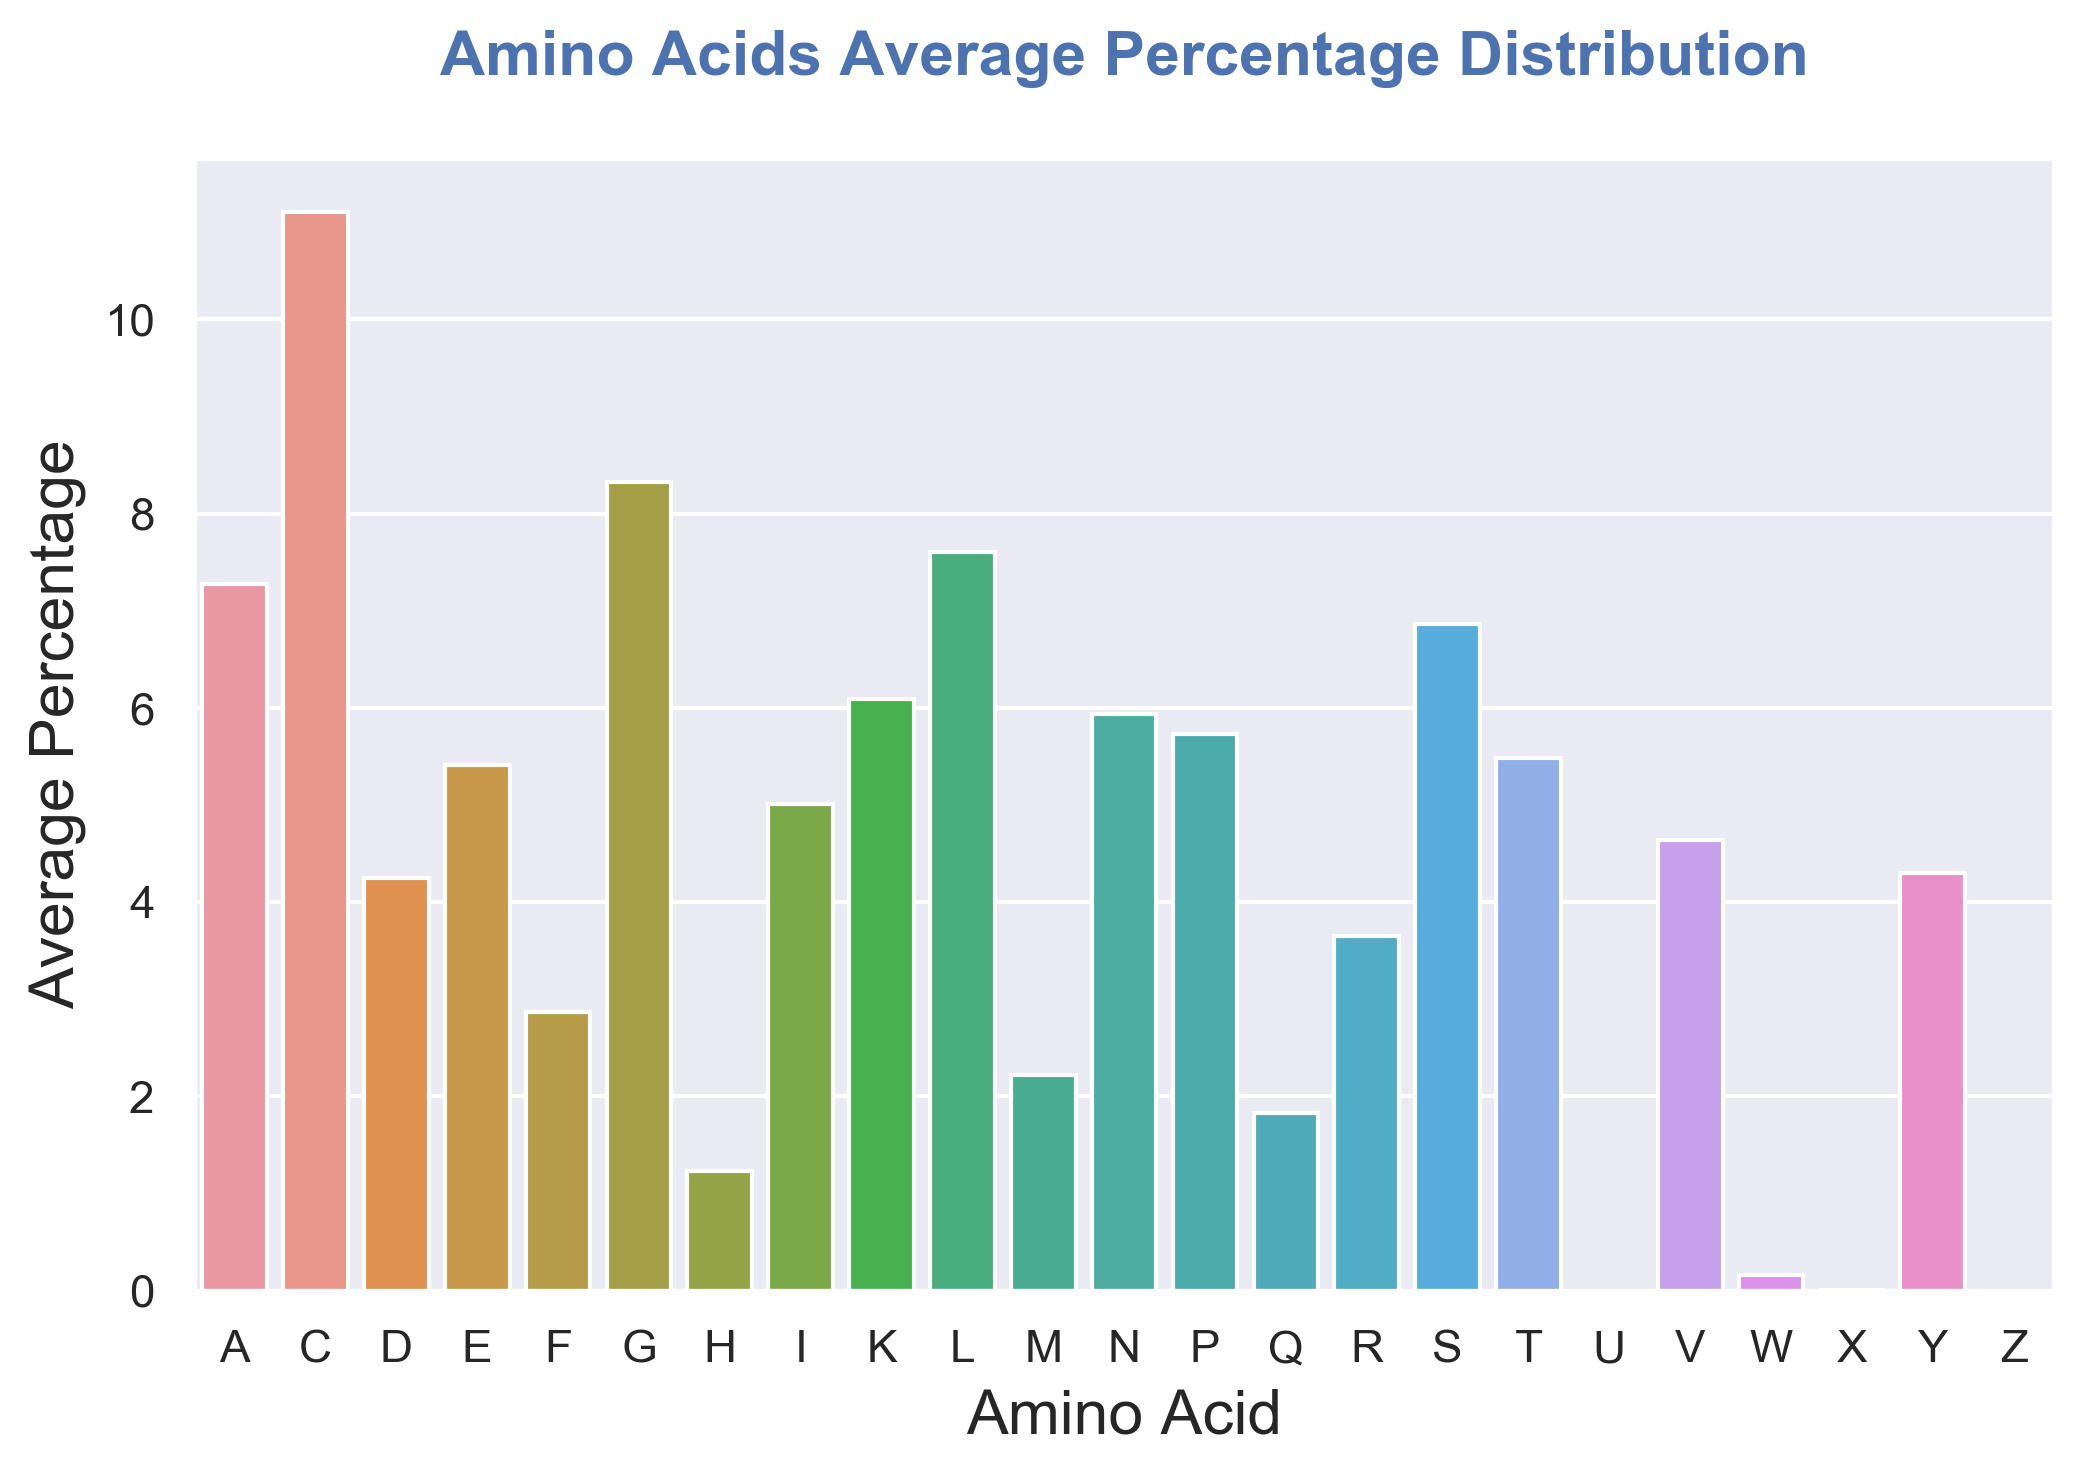

In [91]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Amino Acids Average Percentage Distribution',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Amino Acids',fontdict={'fontsize':15})
plt.ylabel('Average Percentage',fontdict={'fontsize':15})
sns.barplot(x='Amino Acid',y='Average Percentage',data=seq_amino_avgPercentage)

## (2) Domains (IRDs) Data Analysis

In [219]:
# Here we perform different data analysis related to the IRDs i.e. Domains

### (2.1) Domain Distribution

In [220]:
# This anlaysis shows the number of times a Domain has been found in the PIN-II PI database. This information can be retreived 
# finding Domain Frequency in Sequence_Domains relation.

In [13]:
seq_domain_rcl_linker=pd.read_csv('14_Sequences_Domains_RCL_Linker_Organisms.csv')

In [14]:
seq_domain=seq_domain_rcl_linker[['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID','DomainType']]

In [96]:
seq_domain.count()

UniprotID     1298
OrganismID    1298
Organism      1298
Genus         1298
Species       1298
Solanaceae    1298
DomainID      1298
DomainType    1295
dtype: int64

In [100]:
domFrequency=seq_domain.DomainID.value_counts()

In [104]:
#domFrequency.to_csv('Website/G2(1)_DomainsDistribution.csv')

In [105]:
domFrequency=pd.read_csv('Graphs/G11_Domain_Occurrences.csv')

In [107]:
domFrequency.sort_values(by='Occurrences',ascending=False,inplace=True)

In [108]:
top40Domains=domFrequency.head(40)

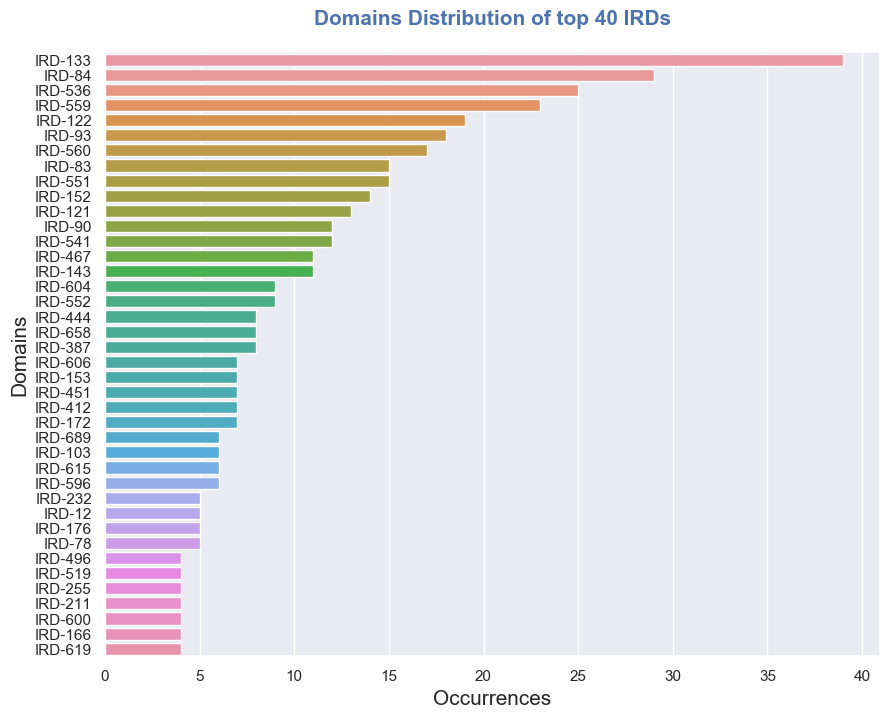

In [109]:
plt.figure(figsize=(10,8),dpi=100)
plt.title('Domains Distribution of top 40 IRDs',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Occurrences',fontdict={'fontsize':15})
plt.ylabel('Domains',fontdict={'fontsize':15})
sns.barplot(x='Occurrences',y='Domains',data=top40Domains)

### (2.2) Species wise distribution of Domains

In [111]:
# It identifies number of Domains found in species. This information can be extracted from tables PI_General_Features, Taxonomy
# and Sequence_Domains. 

In [114]:
seq_domain.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species', 'Solanaceae',
       'DomainID', 'DomainType'],
      dtype='object')

In [117]:
taxonomy.columns

Index(['Taxon', 'Scientific name', 'Common name', 'Organism', 'Genus',
       'Solanaceae'],
      dtype='object')

In [15]:
taxon_species=taxonomy[['Taxon', 'Scientific name']]

In [119]:
taxon_species

Taxon                         Scientific name
0      52838                         Musa balbisiana
1      38414                      Eragrostis curvula
2      15368                 Brachypodium distachyon
3    1088818                   Apostasia shenzhenica
4     906689                    Dendrobium catenatum
5     542762         Camellia sinensis var. sinensis
6      33113                       Atropa belladonna
7       4081                    Solanum lycopersicum
8       4072                         Capsicum annuum
9      33114                       Capsicum baccatum
10      4108                       Solanum chacoense
11      4093                       Nicotiana rustica
12      4096                    Nicotiana sylvestris
13     80379                       Capsicum chinense
14      4111                       Solanum melongena
15      4097                       Nicotiana tabacum
16      4100                   Nicotiana benthamiana
17      4112                          Solanum nigrum
18     35889                     Nicotiana glutinosa
19     49451                     Nicotiana attenuata
20      4113                       Solanum tuberosum
21     76336                       Nicotiana repanda
22     81866                   Nicotiana clevelandii
23    118690                      Nicotiana cavicola
24    118701                      Nicotiana linearis
25    118703                  Nicotiana megalosiphon
26    118704                       Nicotiana miersii
27    118709                      Nicotiana simulans
28    118712                     Nicotiana umbratica
29    109975                      Solanum americanum
30    200300                   Nicotiana spegazzinii
31    200301                     Nicotiana corymbosa
32    200306  Nicotiana occidentalis subsp. hesperis
33    200315                    Nicotiana pauciflora
34    200316                   Nicotiana obtusifolia
35    172790                         Solanum phureja
36    278839                  Nicotiana quadrivalvis
37      4086                     Nicotiana acuminata
38      4087                         Nicotiana alata
39      4146                           Olea europaea
40    429701              Handroanthus impetiginosus
41    192259                          Genlisea aurea
42     28930                         Fagus sylvatica
43     51240                           Juglans regia
44      3694                     Populus trichocarpa
45      3988                        Ricinus communis
46     43335                            Populus alba
47      3983                       Manihot esculenta
48    180498                         Jatropha curcas
49      3476                   Parasponia andersonii
50     63057                         Trema orientale
51    981085                         Morus notabilis
52      3755                           Prunus dulcis
53      3760                          Prunus persica
54     74649                          Rosa chinensis
55      3702                    Arabidopsis thaliana
56     81972        Arabidopsis lyrata subsp. lyrata
57     81985                        Capsella rubella
58      3711                     Brassica campestris
59     51351         Brassica rapa subsp. pekinensis
60      3712                       Brassica oleracea
61    109376         Brassica oleracea var. oleracea
62     69181                        Brassica cretica
63    107243                    Noccaea caerulescens
64     22663                         Punica granatum
65      4155                     Erythranthe guttata
66     88036              Selaginella moellendorffii
67      4529                         Oryza rufipogon
68      4536                            Oryza nivara
69     39946              Oryza sativa subsp. indica
70     39947            Oryza sativa subsp. japonica
71      4533                       Oryza brachyantha
72      4537                          Oryza punctata
73      4538                        Oryza glaberrima
74     40148                    

In [120]:
species_domains=pd.merge(seq_domain,taxon_species,left_on='OrganismID',right_on='Taxon',how='left')

In [122]:
species_domains.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species', 'Solanaceae',
       'DomainID', 'DomainType', 'Taxon', 'Scientific name'],
      dtype='object')

In [123]:
species_domains=species_domains[['Scientific name','DomainID']]

In [133]:
species_domains.duplicated().sum()## These many are duplicate combinations

507

In [134]:
species_domains_unique=species_domains.loc[~species_domains.duplicated(),:].sort_values(['Scientific name','DomainID'])

In [135]:
species_domains_unique.count()

Scientific name    791
DomainID           791
dtype: int64

In [137]:
species_domains_unique['Scientific name'].value_counts()## Number of distinct IRDs(Domains) found in Species

Capsicum annuum                           134
Solanum tuberosum                          81
Nicotiana tabacum                          70
Solanum lycopersicum                       45
Capsicum chinense                          41
Nicotiana sylvestris                       39
Capsicum baccatum                          32
Nicotiana attenuata                        28
Nicotiana obtusifolia                      14
Nicotiana glutinosa                        13
Nicotiana acuminata                        13
Solanum chacoense                          13
Nicotiana occidentalis subsp. hesperis     11
Nicotiana repanda                          11
Solanum nigrum                             11
Nicotiana clevelandii                      10
Selaginella moellendorffii                 10
Nicotiana miersii                          10
Nicotiana pauciflora                       10
Nicotiana rustica                          10
Nicotiana alata                            10
Nicotiana linearis                

In [139]:
#species_domains_unique['Scientific name'].value_counts().to_csv('Website/G2(2)_SpeciesWiseDistributionOfDomains.csv')

In [142]:
specie_domain_freq=pd.read_csv('Website/G2(2)_SpeciesWiseDistributionOfDomains.csv')

In [143]:
specie_domain_freq

Species  Number of IRDs
0                           Capsicum annuum             134
1                         Solanum tuberosum              81
2                         Nicotiana tabacum              70
3                      Solanum lycopersicum              45
4                         Capsicum chinense              41
5                      Nicotiana sylvestris              39
6                         Capsicum baccatum              32
7                       Nicotiana attenuata              28
8                     Nicotiana obtusifolia              14
9                       Nicotiana glutinosa              13
10                      Nicotiana acuminata              13
11                        Solanum chacoense              13
12   Nicotiana occidentalis subsp. hesperis              11
13                        Nicotiana repanda              11
14                           Solanum nigrum              11
15                    Nicotiana clevelandii              10
16               Selaginella moellendorffii              10
17                        Nicotiana miersii              10
18                     Nicotiana pauciflora              10
19                        Nicotiana rustica              10
20                          Nicotiana alata              10
21                       Nicotiana linearis               9
22                    Nicotiana spegazzinii               9
23                   Nicotiana quadrivalvis               9
24                   Nicotiana megalosiphon               9
25                      Nicotiana umbratica               9
26                       Nicotiana simulans               9
27                       Solanum americanum               7
28                    Nicotiana benthamiana               7
29                         Coffea canephora               5
30                           Rosa chinensis               5
31                       Nicotiana cavicola               3
32               Dichanthelium oligosanthes               3
33                      Nicotiana corymbosa               3
34                        Cuscuta australis               3
35                        Triticum aestivum               3
36                          Solanum phureja               3
37                          Sorghum bicolor               3
38                           Genlisea aurea               2
39                          Setaria italica               2
40                         Leersia perrieri               2
41                                 Zea mays               2
42           Saccharum hybrid cultivar R570               2
43               Panicum hallii var. hallii               2
44                            Prunus dulcis               2
45               Handroanthus impetiginosus               2
46     Aegilops tauschii subsp. strangulata               2
47                           Prunus persica               2
48                        Manihot esculenta               2
49                           Ananas comosus               2
50                      Medicago truncatula               2
51                          Jatropha curcas               1
52                           Panicum hallii               1
53                         Oryza glaberrima               1
54                        Oryza brachyantha               1
55                  Brachypodium distachyon               1
56                        Aegilops tauschii               1
57                           Vitis vinifera               1
58                     Noccaea caerulescens               1
59                            Olea europaea               1
60                          Fagus sylvatica               1
61                      Brassica campestris               1
62                          Setaria viridis               1
63                        Oryza glumipatula               1
64                         Brassica cretica               1
65                          Cicer arietinum               1
66              

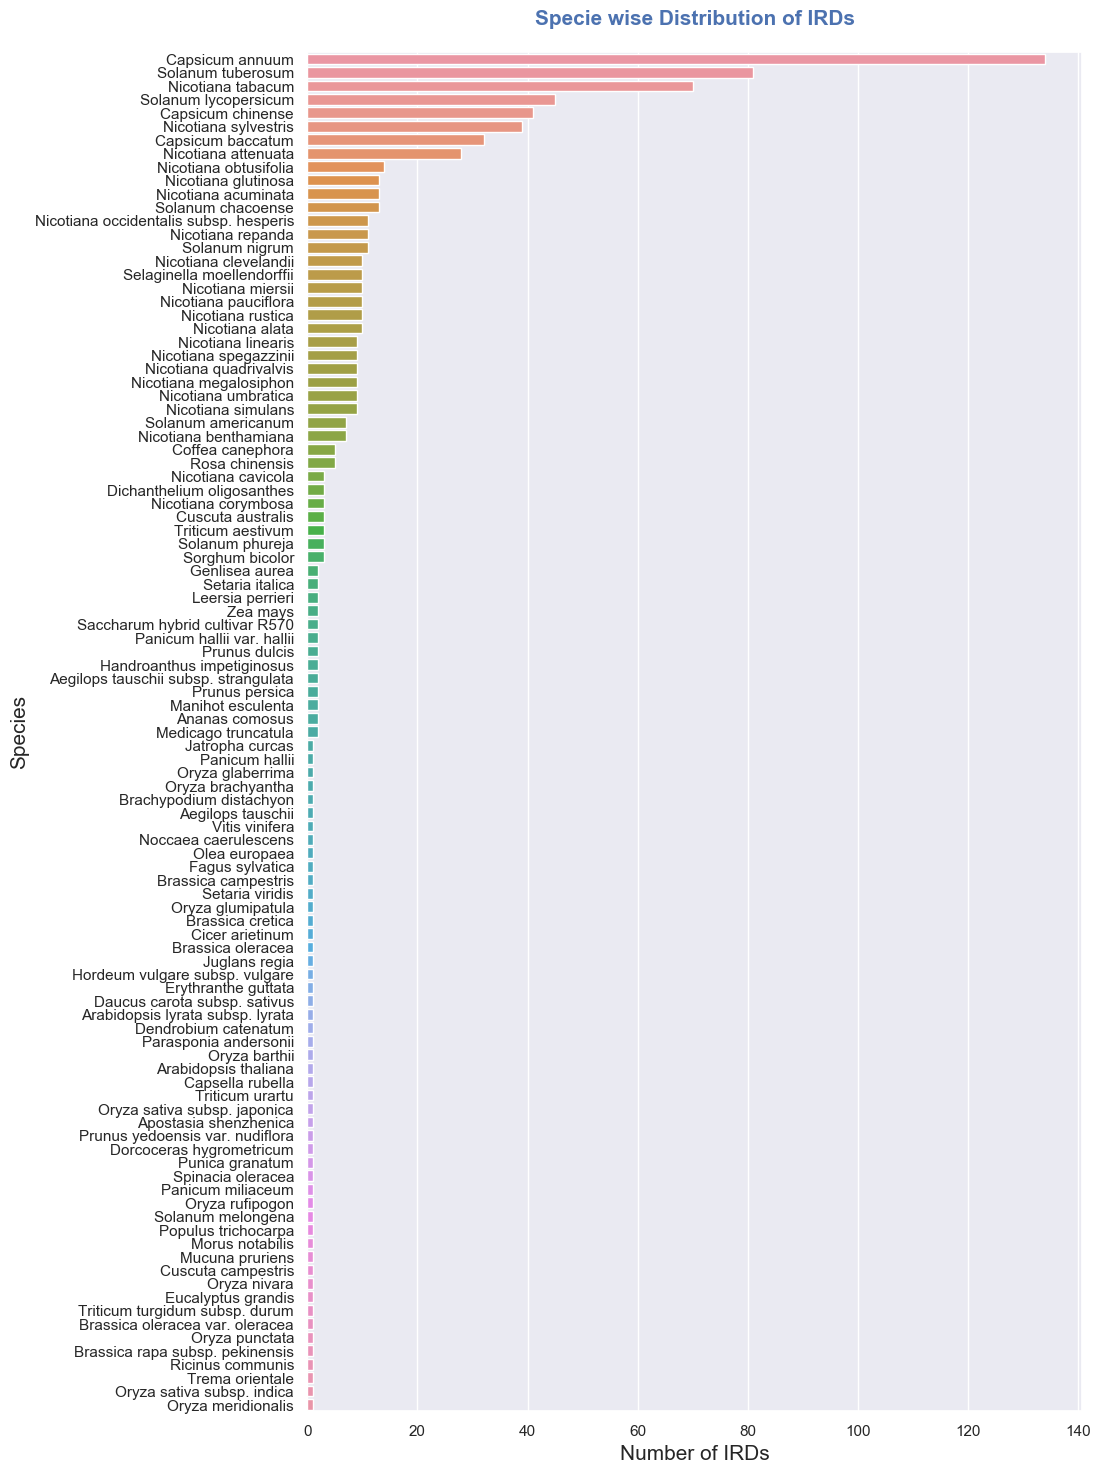

In [147]:
plt.figure(figsize=(10,18),dpi=100)
plt.title('Specie wise Distribution of IRDs',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of IRDs',fontdict={'fontsize':15})
plt.ylabel('Specie',fontdict={'fontsize':15})
g=sns.barplot(x='Number of IRDs',y='Species',data=specie_domain_freq)
#g.legend_.remove()

### (2.3) Genus wise distribution of Domains

In [149]:
seq_domain.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species', 'Solanaceae',
       'DomainID', 'DomainType'],
      dtype='object')

In [150]:
genus_domain=seq_domain[['Genus','DomainID']]

In [151]:
genus_domain.duplicated().sum()

605

In [152]:
genus_UniqueDomain=genus_domain.loc[~genus_domain.duplicated(),:]

In [153]:
genus_UniqueDomain.count()

Genus       693
DomainID    693
dtype: int64

In [154]:
genus_UniqueDomain.Genus.value_counts()## Number of distinct IRDs(Domains) found in Genus

Nicotiana        267
Capsicum         184
Solanum          152
Selaginella       10
Coffea             5
Rosa               5
Oryza              4
Panicum            3
Cuscuta            3
Triticum           3
Sorghum            3
Prunus             3
Dichanthelium      3
Setaria            2
Brassica           2
Saccharum          2
Arabidopsis        2
Genlisea           2
Aegilops           2
Zea                2
Manihot            2
Handroanthus       2
Leersia            2
Ananas             2
Medicago           2
Juglans            1
Daucus             1
Fagus              1
Spinacia           1
Morus              1
Ricinus            1
Brachypodium       1
Olea               1
Cicer              1
Erythranthe        1
Jatropha           1
Vitis              1
Dorcoceras         1
Capsella           1
Trema              1
Apostasia          1
Dendrobium         1
Noccaea            1
Mucuna             1
Populus            1
Eucalyptus         1
Hordeum            1
Punica       

In [156]:
#genus_UniqueDomain.Genus.value_counts().to_csv('Website/G2(3)_GenusWiseDistributionOfDomains.csv')## Number of distinct IRDs(Domains) found in Genus

In [157]:
genus_domain_freq=pd.read_csv('Website/G2(3)_GenusWiseDistributionOfDomains.csv')

In [158]:
genus_domain_freq.head()

Genus  Number of IRDs
0    Nicotiana             267
1     Capsicum             184
2      Solanum             152
3  Selaginella              10
4       Coffea               5

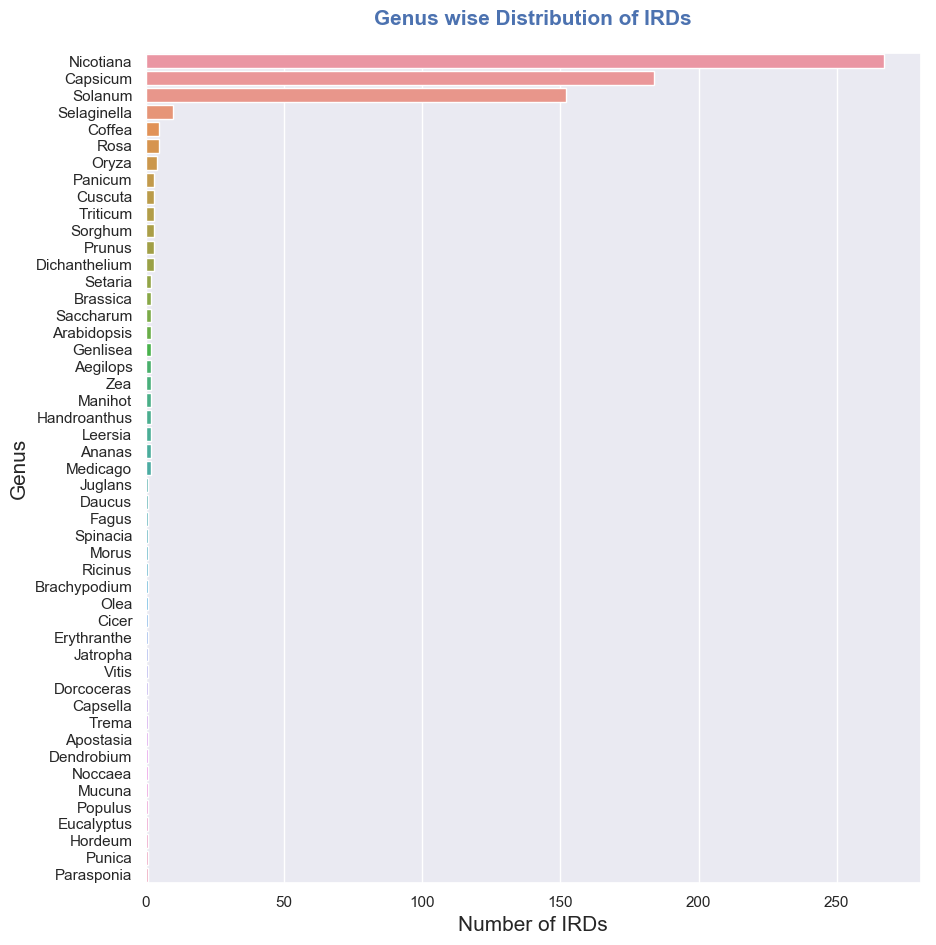

In [159]:
plt.figure(figsize=(10,11),dpi=100)
plt.title('Genus wise Distribution of IRDs',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of IRDs',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})
g=sns.barplot(x='Number of IRDs',y='Genus',data=genus_domain_freq)
#g.legend_.remove()

### (2.4) Domain Architectures

In [160]:
# Here we find what combinations of Domains are found in the PIs sequences and how many sequences have these combinations. 
# This information can be found from the sequence_domain table

In [162]:
seq_domain.UniprotID.count()

1298

In [163]:
seq_domain.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species', 'Solanaceae',
       'DomainID', 'DomainType'],
      dtype='object')

In [165]:
seq_domain.UniprotID.nunique()

380

In [166]:
seq_domain.UniprotID.value_counts()## This gives the number of domains found in a particular Sequence

A0A1U7WDA6    21
Q1WL35        15
Q1WL31        15
Q9SDW8        15
Q84LJ9        13
Q1WL36        13
Q1WL38        13
A0A1U7Y2F0    13
A0A1S4CPA1    12
Q1WL30        11
Q1WL45        11
Q2XVY5        11
A0A1S4A0N1    11
Q40378        11
A0A2G3A0S4    11
Q1WL40        11
Q1WL49        11
Q1WL39        11
Q1WL43        11
A0A1S4CNR9    11
Q1WL29        11
A0A1S3YZT7    11
Q9SDW7        11
Q1WL44        11
Q5YLI5        11
B3F0C1        11
Q6H238        10
A0A1S4CNP7    10
Q1WL46         9
Q1WL48         9
Q1WL47         9
Q1WL42         9
A0A1J6J0L2     9
Q1WL41         9
T1PZF6         7
A0A2G2V3L7     7
Q4ZIQ2         7
Q1WL50         7
A0A2G3AT14     7
Q4U5Z5         7
T1PZ64         7
Q3SBE6         7
Q9SQ77         7
A0A2G3AW63     7
Q4ZIQ3         7
T1PZB4         7
Q4ZIQ5         7
Q4ZIQ4         7
T1PZ85         7
A0A3Q7IU74     7
A0A1S3Z2Q3     6
A0A2G2X8T6     5
A0A3Q7FEG3     5
T1PZB3         5
T1PZ89         5
T1PZ72         5
T1PZK2         5
T1PZ91         5
A0A3Q7FEJ3    

In [170]:
#seq_domain.UniprotID.value_counts().to_csv('Website/G2(4)(a)_SequencyFrequency.csv')

In [171]:
seq_freq=pd.read_csv('Website/G2(4)(a)_SequencyFrequency.csv')

In [172]:
seq_freq

UniprotID  Number of Domains
0    A0A1U7WDA6                 21
1        Q1WL35                 15
2        Q1WL31                 15
3        Q9SDW8                 15
4        Q84LJ9                 13
5        Q1WL36                 13
6        Q1WL38                 13
7    A0A1U7Y2F0                 13
8    A0A1S4CPA1                 12
9        Q1WL30                 11
10       Q1WL45                 11
11       Q2XVY5                 11
12   A0A1S4A0N1                 11
13       Q40378                 11
14   A0A2G3A0S4                 11
15       Q1WL40                 11
16       Q1WL49                 11
17       Q1WL39                 11
18       Q1WL43                 11
19   A0A1S4CNR9                 11
20       Q1WL29                 11
21   A0A1S3YZT7                 11
22       Q9SDW7                 11
23       Q1WL44                 11
24       Q5YLI5                 11
25       B3F0C1                 11
26       Q6H238                 10
27   A0A1S4CNP7                 10
28       Q1WL46                  9
29       Q1WL48                  9
30       Q1WL47                  9
31       Q1WL42                  9
32   A0A1J6J0L2                  9
33       Q1WL41                  9
34       T1PZF6                  7
35   A0A2G2V3L7                  7
36       Q4ZIQ2                  7
37       Q1WL50                  7
38   A0A2G3AT14                  7
39       Q4U5Z5                  7
40       T1PZ64                  7
41       Q3SBE6                  7
42       Q9SQ77                  7
43   A0A2G3AW63                  7
44       Q4ZIQ3                  7
45       T1PZB4                  7
46       Q4ZIQ5                  7
47       Q4ZIQ4                  7
48       T1PZ85                  7
49   A0A3Q7IU74                  7
50   A0A1S3Z2Q3                  6
51   A0A2G2X8T6                  5
52   A0A3Q7FEG3                  5
53       T1PZB3                  5
54       T1PZ89                  5
55       T1PZ72                  5
56       T1PZK2                  5
57       T1PZ91                  5
58   A0A3Q7FEJ3                  5
59   A0A097J9C5                  5
60   A0A097J9D3                  5
61   A0A097J9C9                  5
62   A0A2G2X8Q0                  5
63       T1PZ73                  5
64       Q9SDL4                  5
65   A0A1U8GHX6                  5
66       T1PZ90                  5
67       T1PZB7                  5
68       O49146                  5
69       T1PZ65                  5
70       Q4U5Z3                  5
71   A0A1U7XB93                  5
72       M0ZZR6                  5
73   A0A1J6JJ91                  5
74       T1PZ68                  5
75       Q4Z8K3                  5
76       Q43502                  5
77       T1PZK7                  5
78       M1B8F7                  5
79       M1B8F8                  5
80   A0A097J9D5                  5
81   A0A075EZT7                  5
82       Q4U5Z4                  5
83   A0A1U8GFH5                  5
84   A0A2G2X8V0                  5
85       T1PZ76                  5
86       Q43710                  5
87   A0A3Q7FH23                  5
88       T1PZ78                  5
89       Q4ZIQ6                  5
90       T1PZ75                  5
91   A0A1U8G7B9                  5
92   A0A2G3AW40                  5
93       T1PZ86                  5
94   A0A2G3A0U2                  5
95       T1PZF5                  5
96   A0A097J9C0                  5
97   A0A2G3A0X2                  5
98       T1PZF8                  5
99       T1PZK4                  5
100      T1PZJ8                  5
101  A0A2G2V3L6                  5
102      T1PZK0                  5
103      T1PZF0                  5
104      T1PZB1                  5
105      T1PZF2                  5
106      M1B8F9                  5
107  A0A097J9D8                  5
108  A0A2G3A0T9                  5
109  A0A097J9D7                  5
110      T1PZL0                  5
111      T1PZJ7                  5
112      M1DJV3                  5
113      T1PZF7 

In [174]:
domArch=seq_freq['Number of Domains'].value_counts()

In [176]:
#domArch.to_csv('Website/G2(4)(b)_DomainArchitecture.csv')

In [181]:
domArch=pd.read_csv('Website/G2(4)(b)_DomainArchitecture.csv')

In [182]:
domArch

Domains Count  Number of Sequences
0               1                  170
1               5                   77
2               3                   50
3               2                   22
4              11                   17
5               7                   16
6               4                   10
7               9                    6
8              13                    4
9              15                    3
10             10                    2
11             21                    1
12             12                    1
13              6                    1

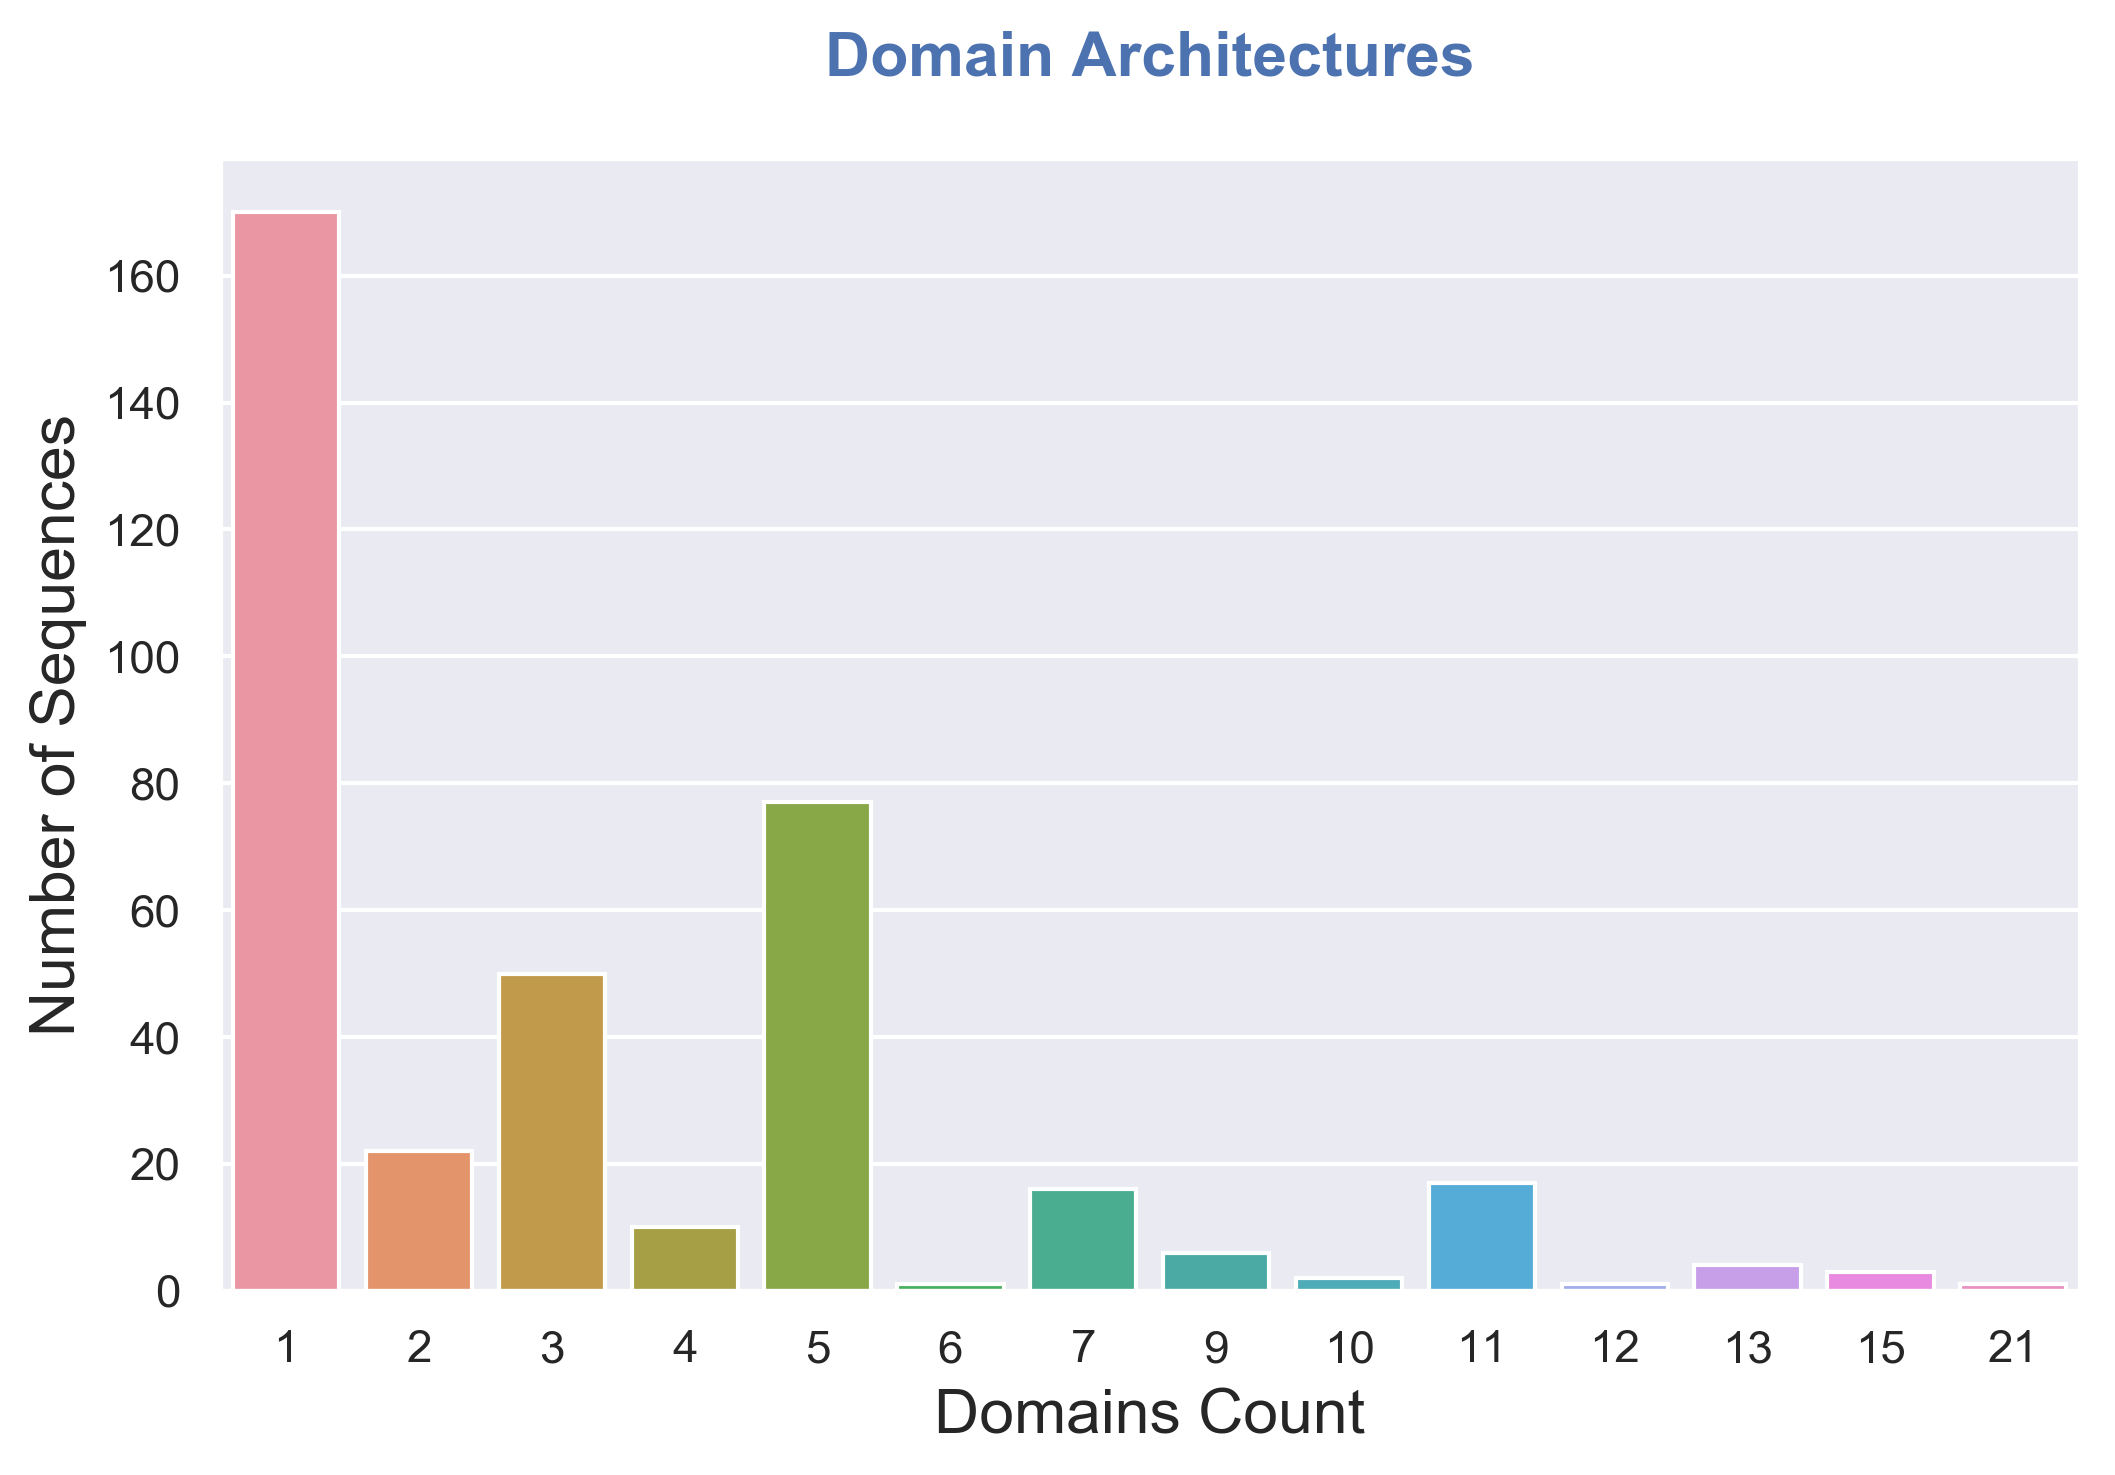

In [197]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Domain Architectures',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('n-Domains',fontdict={'fontsize':15})
plt.ylabel('Number of Sequences',fontdict={'fontsize':15})
sns.barplot(x='Domains Count',y='Number of Sequences',data=domArch)

### (2.5) Disulphide Bonds Ditsribution

In [184]:
# It shows number of Domians having a particular count of Disulphide Bonds. This information can be retreived from table
# Disulphide Bonds

In [185]:
dsBonds=pd.read_csv('15_Domains_Disulphide_Bonds.csv')

In [187]:
dsBonds.count()

domainID        698
sequence        698
dsBonds_list    698
bondCount       698
confidence      698
dtype: int64

In [188]:
dsBonds.columns

Index(['domainID', 'sequence', 'dsBonds_list', 'bondCount', 'confidence'], dtype='object')

In [190]:
dsBondsDistribution=dsBonds.bondCount.value_counts()

In [193]:
#dsBondsDistribution.to_csv('Website/G2(5)(b)_DSBondsDistribution.csv')

In [194]:
dsBondsDistribution=pd.read_csv('Website/G2(5)(b)_DSBondsDistribution.csv')

In [195]:
dsBondsDistribution

n-Disulphide Bonds  Number of Domains
0                   4                647
1                   3                 28
2                   2                 15
3                   0                  7
4                   1                  1

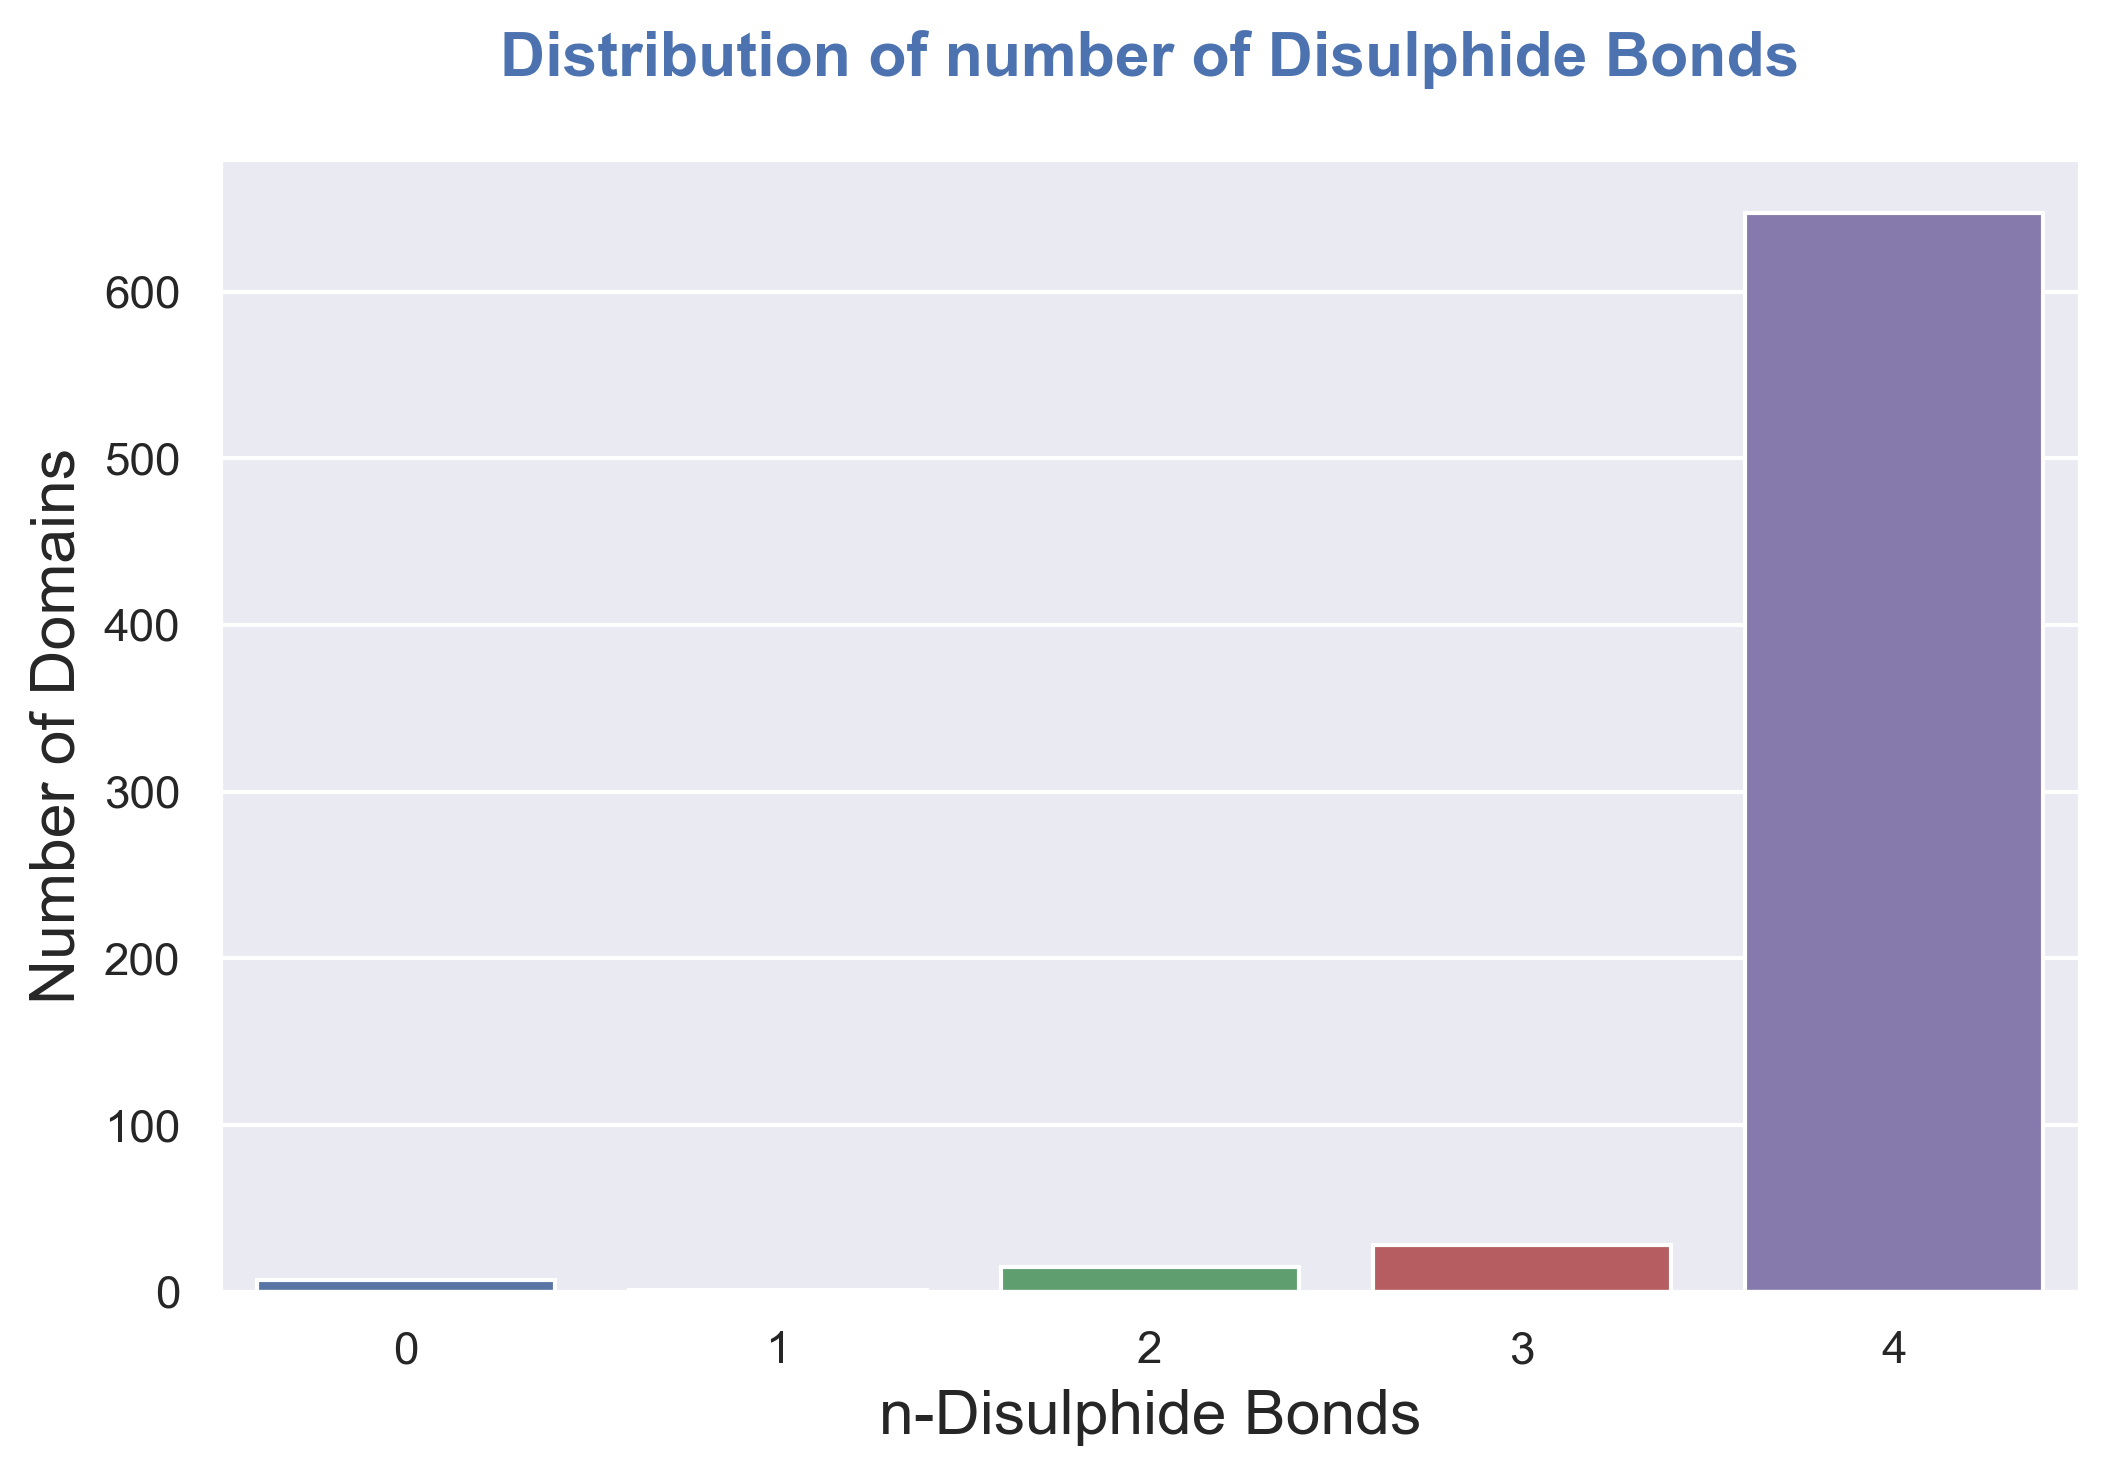

In [196]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Distribution of number of Disulphide Bonds',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('n-Disulphide Bonds',fontdict={'fontsize':15})
plt.ylabel('Number of Domains',fontdict={'fontsize':15})
sns.barplot(x='n-Disulphide Bonds',y='Number of Domains',data=dsBondsDistribution)

### (2.6) Cysteine content Distribution

In [198]:
# It shows how many Domains have a particular number of Cysteine in their sequences. The informtion can be retrieved from the
# domains amino composition table

In [199]:
dom_amino_comp=pd.read_csv('18_Domain_Amino_Composition.csv')

In [200]:
dom_cys_comp=dom_amino_comp[['DomainID', 'C','C_per']]

In [201]:
cysCountFreq=dom_cys_comp.C.value_counts()

In [204]:
#cysCountFreq.to_csv('Website/G2(6)_CysteineCountFrequency.csv')

In [205]:
cysCountFreq=pd.read_csv('Website/G2(6)_CysteineCountFrequency.csv')

In [206]:
cysCountFreq

Cysteine Count  Number of Domains
0               8                642
1               7                 38
2               9                  7
3               4                  6
4               6                  2
5               3                  2
6               5                  1

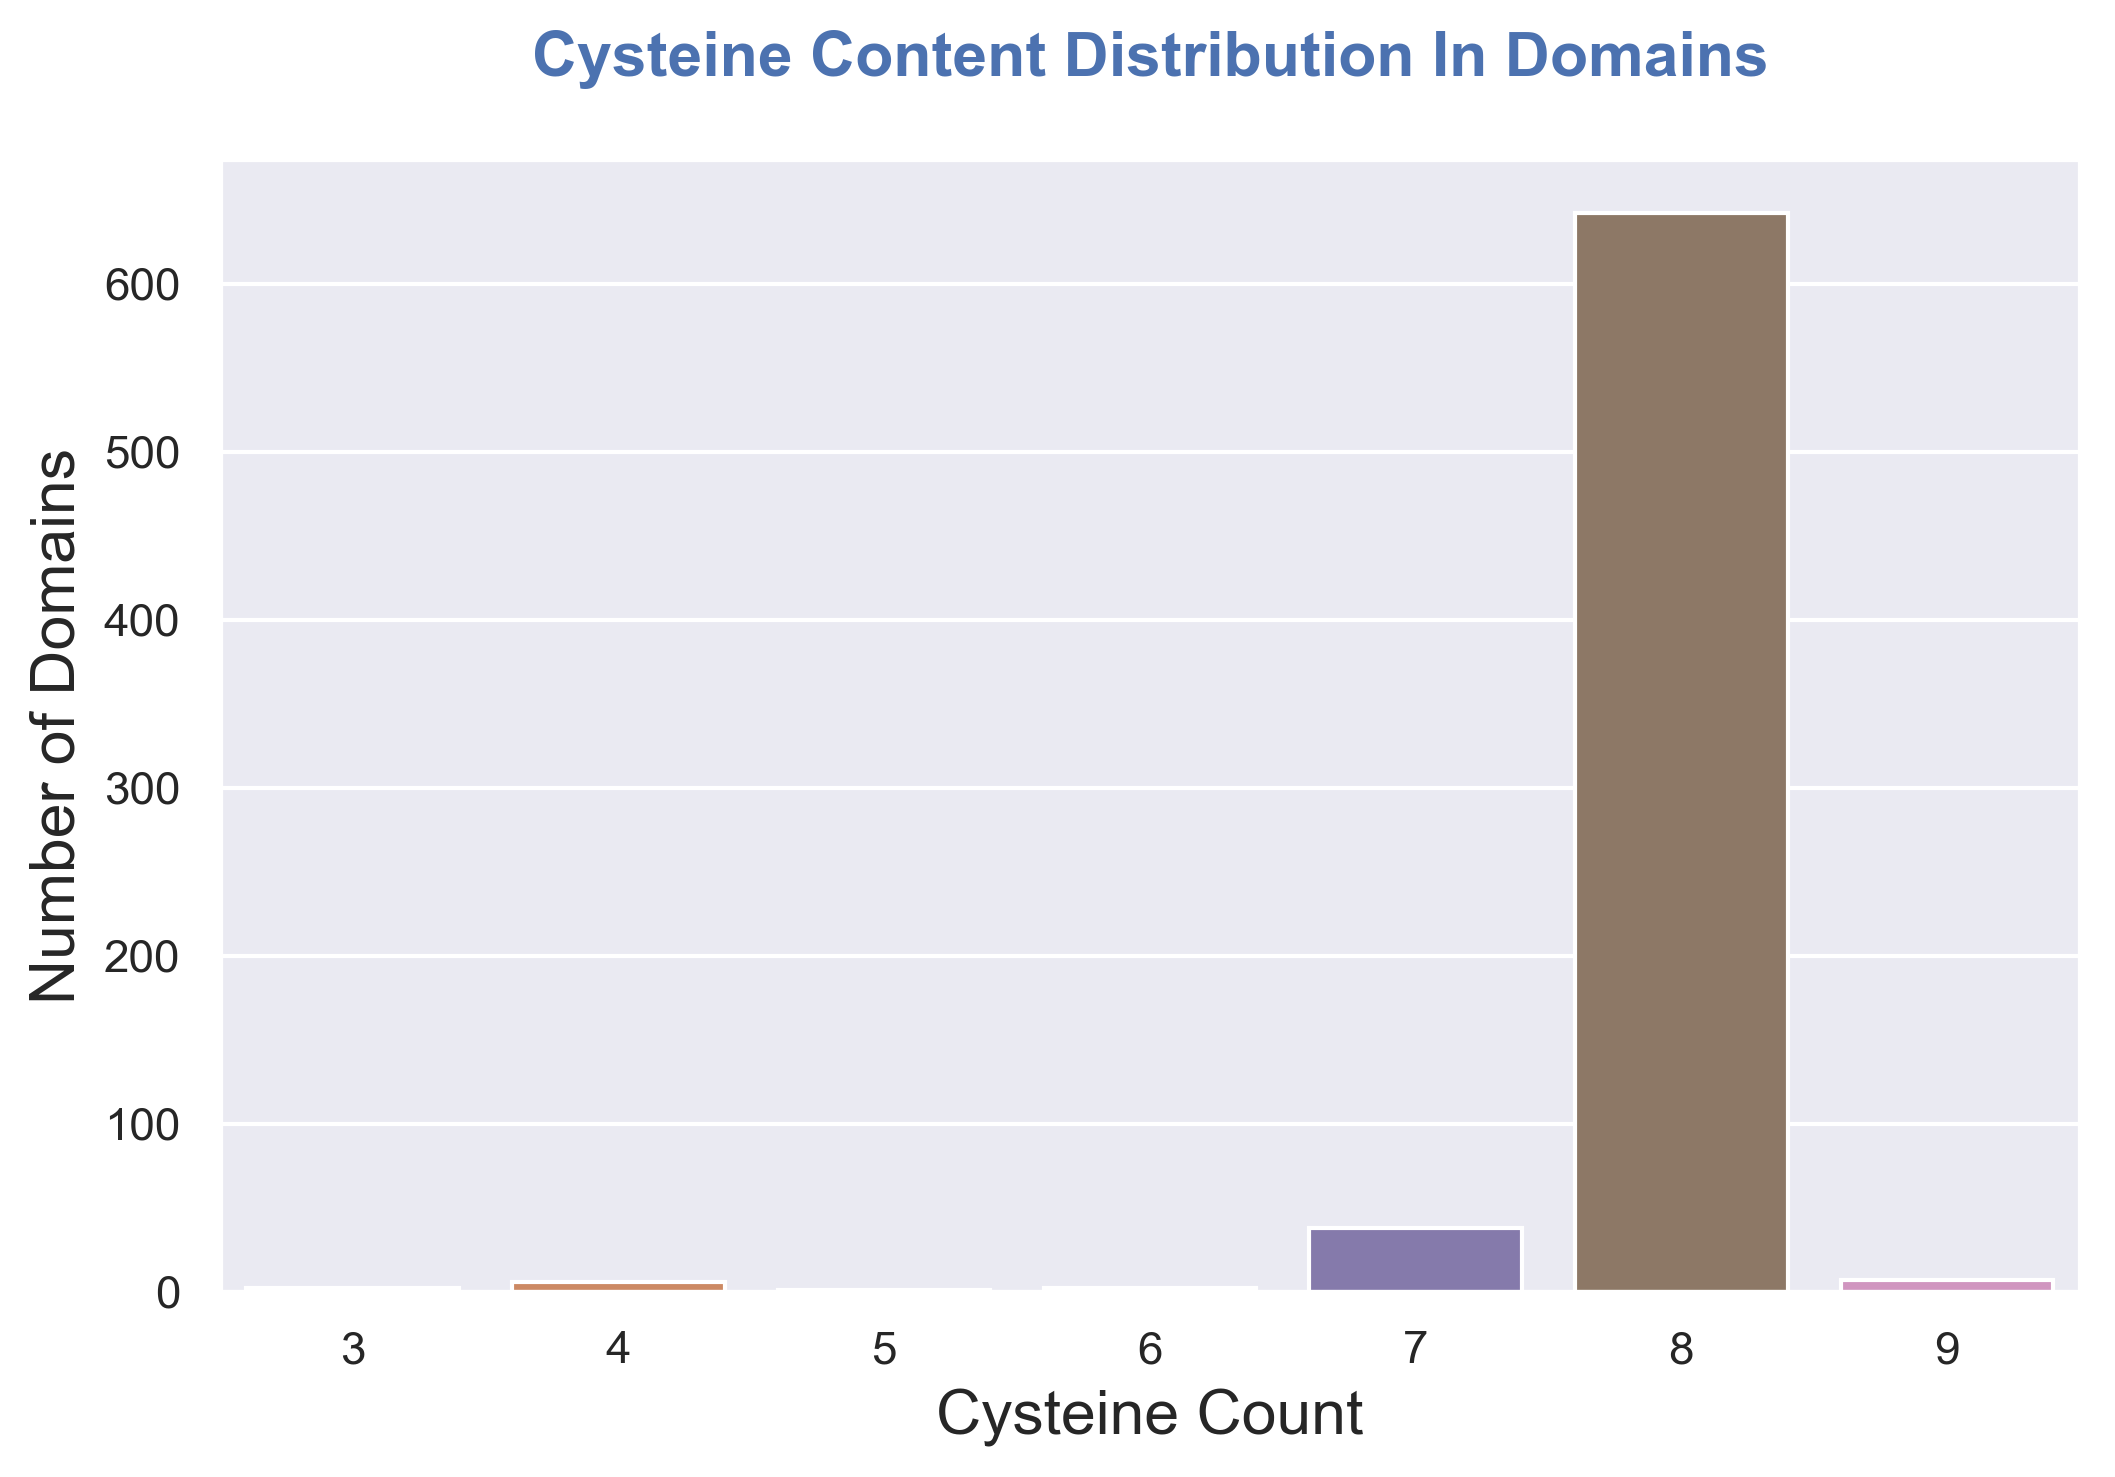

In [207]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Cysteine Content Distribution In Domains',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Cysteine Count',fontdict={'fontsize':15})
plt.ylabel('Number of Domains',fontdict={'fontsize':15})
sns.barplot(x='Cysteine Count',y='Number of Domains',data=cysCountFreq)

### (2.7) Amino Acid (AA) Composition

In [208]:
# To show the distribution of Amino Acids in the composition of Domains sequences. We find the avearge of percentage of Amino Acid
# in each Domain.

In [209]:
dom_amino_comp=pd.read_csv('18_Domain_Amino_Composition.csv')

In [210]:
dom_amino_comp

Unnamed: 0 DomainID                                             Domain  \
0             1    IRD-1  QICINCCAGKKGCNYFSADGTFICEGESEYVSEVNDNLEKHCPRNC...   
1             2    IRD-2  QICTNCCAGKKGCMYFSDDGTFICEGESEYVSEVPVDNKPCPRNCD...   
2             3    IRD-3  QICTNCCAGKKGCMYFSNDGTFICEGESEYVSEVPVDNKPCPRNCD...   
3             4    IRD-4  VGCTNCCSGTEGCNYYSANGTFICEGQTKKTIDETNKACPRNCNPR...   
4             5    IRD-5  LGCTNCCAGSLGCNYYSANGTFICEGESEIKVETIETEVETMVEPN...   
5             6    IRD-6  VGCTNCCAAKKGCNYFSANGTFVCEGETETKVETIETEVETMVELN...   
6             7    IRD-7  GICTNCCAGKKGCYYFSVDGTFICEGESDYVSKIKNDVGKACPFNC...   
7             8    IRD-8  VGCTNCCSGTEGCNYFSANGTFICEGQTKKTIDETNKVCPFNCNPR...   
8             9    IRD-9        TGCTTCCTGYTDCYYFGKDGKFVCEGESIEPKACTLECDSRLH   
9            10   IRD-10  TGCTTCCTGYKGCYYFGKDGKFVCEGESTEPKACTLECDPRVAYMT...   
10           11   IRD-11  TGCTTCCTGYKGCYYFGKDGKFVCEGESTEPKACTLECDPRVAYMT...   
11           12   IRD-12  TGCTTCCTGYKGCYYFGKDGKFLCEGESTEPKACTLECDPRVAYMT...   
12           13   IRD-13  TGCTTCCTGYKGCYYFGKDGKFVCEGESIEPKACTLECDSRVAYMT...   
13           14   IRD-14  TGCTTCCTGYKGCYYFGHDGKFVCEGQSSEPRACTLECDPKVAYMT...   
14           15   IRD-15  TECTTCCTGYKGCYYFGHDGKFVCEGQSSEPRACTLECDPKVAYMT...   
15           16   IRD-16  KICTKECGNLGFGICPRSEGSPKNPICINCCSGYKGCNYYSVFGRF...   
16           17   IRD-17  KICTKECLNVGYMICPSSGPQKLHPSCTNCCRAQKGCKLYRSDGTLICT   
17           18   IRD-18  GLCTNCCAGKKGCKYFSKDGTYICDGESEWVSEKNNNLKKACTKEC...   
18           19   IRD-19  GLCTNCCAGKKGCKYFSKDGTYICDGESEWVSEKDNNLEKDCTKEC...   
19           20   IRD-20  TGCTTCCTGYKGCYYFGQDGEFVCEGESIEPKGCTKECDPRVAYMT...   
20           21   IRD-21  GICINCCSGFKECKYFSKDYTFICDGESKDWESRKACSKECDRRIE...   
21           22   IRD-22  GICINCCSGYKECKYFSKDYTFICDGESKDWQSRKACSKECDRRIE...   
22           23   IRD-23  GICINCCSGYKECKYFSKDYTFICDGESTDWQSGKACSKECDRRIE...   
23           24   IRD-24  GICINCCSGFKECKYFSKDYTFICDGESKDWESRKACSKECDRRIE...   
24           25   IRD-25  GICINCCSGFKECKYFSKDYTLICDGESKDWESRKACSKECDRRIE...   
25           26   IRD-26  PLCVNCCSGKIGCKYFNKNGTFICDGGSEWDGRKACSKECDPRIDI...   
26           27   IRD-27  TGCTTCCTGYKGCYYFGQEGEFVCEGESIEPKGCTQECDPRVAYMT...   
27           28   IRD-28  TGCTTCCTGYKGCYYYGKDDKFVCEGESIEPRVCTQECDPRVAYMT...   
28           29   IRD-29  TGCTTCCTGYKGCYYYGKDGKFVCEGESIEPRVCTQECDPRVAYMT...   
29           30   IRD-30  TGCTTCCTGYKGCYYYGKDDKFVCEGESIEPRVCTQECDPRVAYMT...   
30           31   IRD-31  IECTSCCTGYKGCYYFDLDGKFVCEGKRSEPKICTQQCDPKVAYMI...   
31           32   IRD-32  TKCTTCCTGYKGCYYYGKDNKFVCEGQSNEPKVCTQQCDPKVAYMT...   
32           33   IRD-33  TGCTTCCTGYKGCYYYGKDNKFVCEGQSDEPKVCTQQCDPKVAYMT...   
33           34   IRD-34  IECTSCCTGYKGCYYFGLDGKFVCEGKRSEPKICTQQCDPKVAYMI...   
34           35   IRD-35  TGCTNCCTGYKGCYYFGEDGKFVCKGESPEPKICPAICDLTAAYMT...   
35           36   IRD-36  TGCTNCCTGYKGCYYFGKDGKFVCEGESTEPKKCPAICIIDAYMTCPSS   
36           37   IRD-37  TGCTNCCTGYKGCYYFGKDGKFVCEGESTEPKKCPAICIIAAYMTCPSS   
37           38   IRD-38  RICTNCCAARKGCNYFSADGTFVCKGESVVESMIEAVKPCRRNCDG...   
38           39   IRD-39  VGCTNCCAAKKGCNYFSANGTFVCKGESVVESMIEAVKPCRRNCDG...   
39           40   IRD-40  TGCTTCCTGYKGCYYFGKDGKFVCEGESDEPKACTMECDPRVAYMI...   
40           41   IRD-41  TGCTTCCTGYKGCYYFGQDGEFVCEGESDEPKSCTTECDPRVATIS...   
41           42   IRD-42  TGCTTCCTGYKGCYYFGQDGEFVCEGESDEPKSCTTECDPRVATIS...   
42           43   IRD-43  PICTNCCSGYKGCNYYSANGTFICEGRSDPRKTNICTQHCDPRVAY...   
43           44   IRD-44  PICTNCCSGYKGCNYYSADGTFVCEGEFDPKEGPKACPANCDPRIA...   
44           45   IRD-45  PICTNCCSGYKGCNYYSADGTFICEGEFDPKEGPKACPANCDPRIA...   
45           46   IRD-46    PICTNCCAGYKGCNYYSANGTFICEGQSHPKNPKACPRNCDPHIAYS   
46           47   IRD-47  GICTNCCAGKKGCNYFSANGTFICEGESKFVSEADNNHGKPCPRNC...   
47           48   IRD-48  RICTNCCAGRKGCNYYSADGTFICEGESDPNSPKACPRNCDPNIAY...   
48           49   IRD-49  RICTNCCAGRKGCNYFSDIGTFICEGESHPNNPKACPRNCDTRIAY...   
49           50   IRD-50  PICTTCCAGYKGCYYYDANGKLICEGQSD

In [211]:
dom_amino_percentage=dom_amino_comp[['A_per','C_per','D_per','E_per','F_per','G_per','H_per','I_per','K_per','L_per','M_per',
       'N_per','O_per','P_per','Q_per','R_per','S_per','T_per','U_per','V_per','W_per','X_per','Y_per','Z_per']]

In [212]:
dom_amino_percentage

A_per      C_per      D_per      E_per     F_per      G_per  \
0     5.172414  13.793103   5.172414   8.620690  3.448276   6.896552   
1     3.508772  14.035088   7.017544   7.017544  3.508772  10.526316   
2     3.508772  14.035088   5.263158   7.017544  3.508772  10.526316   
3     5.454545  14.545455   1.818182   5.454545  1.818182  10.909091   
4     3.333333  11.666667   1.666667  13.333333  1.666667  10.000000   
5     5.000000  11.666667   1.666667  13.333333  5.000000   8.333333   
6     3.448276  13.793103   6.896552   3.448276  5.172414  12.068966   
7     3.636364  14.545455   1.818182   5.454545  5.454545  10.909091   
8     2.325581  16.279070   6.976744   9.302326  4.651163  11.627907   
9     4.000000  16.000000   4.000000   8.000000  4.000000  12.000000   
10    6.000000  16.000000   4.000000   8.000000  4.000000  12.000000   
11    4.000000  16.000000   4.000000   8.000000  4.000000  12.000000   
12    4.000000  16.000000   4.000000   8.000000  4.000000  12.000000   
13    4.000000  16.000000   4.000000   6.000000  4.000000  12.000000   
14    4.000000  16.000000   4.000000   8.000000  4.000000  10.000000   
15    0.000000  16.000000   0.000000   6.000000  6.000000  16.000000   
16    2.040816  16.326531   2.040816   2.040816  0.000000   8.163265   
17    3.448276  13.793103   6.896552   6.896552  3.448276  10.344828   
18    1.724138  13.793103  10.344828   8.620690  3.448276  10.344828   
19    2.000000  16.000000   4.000000  10.000000  4.000000  14.000000   
20    1.886792  15.094340   9.433962   9.433962  7.547170   7.547170   
21    1.886792  15.094340   9.433962   7.547170  5.660377   7.547170   
22    1.886792  15.094340   9.433962   7.547170  5.660377   9.433962   
23    1.886792  15.094340   9.433962   9.433962  5.660377   7.547170   
24    1.886792  15.094340   9.433962   9.433962  5.660377   7.547170   
25    3.846154  15.384615   7.692308   3.846154  5.769231  13.461538   
26    2.000000  16.000000   2.000000  12.000000  4.000000  14.000000   
27    2.000000  16.000000   6.000000   8.000000  2.000000  10.000000   
28    2.000000  16.000000   4.000000   8.000000  2.000000  12.000000   
29    2.000000  16.000000   8.000000   8.000000  2.000000  10.000000   
30    2.000000  16.000000   6.000000   6.000000  4.000000   8.000000   
31    2.000000  16.000000   4.000000   6.000000  2.000000   8.000000   
32    2.000000  16.000000   6.000000   6.000000  2.000000  10.000000   
33    2.000000  16.000000   4.000000   6.000000  4.000000  10.000000   
34    6.000000  16.000000   4.000000   6.000000  4.000000  12.000000   
35    4.081633  16.326531   4.081633   6.122449  4.081633  12.244898   
36    6.122449  16.326531   2.040816   6.122449  4.081633  12.244898   
37    7.142857  14.285714   3.571429   5.357143  3.571429   8.928571   
38    7.142857  14.285714   1.785714   5.357143  3.571429  10.714286   
39    4.000000  16.000000   6.000000   8.000000  4.000000  12.000000   
40    2.000000  16.000000   6.000000  10.000000  6.000000  12.000000   
41    2.000000  16.000000   6.000000  10.000000  4.000000  12.000000   
42    3.846154  15.384615   3.846154   1.923077  1.923077   7.692308   
43    7.547170  15.094340   5.660377   5.660377  3.773585   9.433962   
44    7.547170  15.094340   5.660377   5.660377  3.773585   9.433962   
45    8.510638  14.893617   2.127660   2.127660  2.127660   8.510638   
46    8.620690  13.793103   3.448276   5.172414  5.172414  10.344828   
47    7.692308  15.384615   5.769231   5.769231  1.923077   7.692308   
48    5.882353  13.725490   3.921569   3.921569  3.921569   7.843137   
49    5.660377  15.094340   5.660377   1.886792  0.000000   9.433962   
50    5.769231  15.384615   3.846154   5.769231  3.846154  11.538462   
51    9.615385  15.384615   3.846154   3.846154  1.923077   7.692308   
52    6.382979  14.893617   4.255319   4.255319  2.127660   8.510638   
53   12.765957  14.893617   6.382979   2.127660  2.127660   8.510638   
54    1.923077  15.384615   3.846154   1.923077  

In [213]:
dom_amino_percentage.agg([np.mean],axis=0).transpose()

mean
A_per   5.696042
C_per  15.429562
D_per   4.967127
E_per   4.525737
F_per   3.207083
G_per   9.611348
H_per   0.596469
I_per   4.962365
K_per   6.973659
L_per   2.842371
M_per   0.624147
N_per   6.804800
O_per   0.000000
P_per   6.759428
Q_per   1.282522
R_per   5.344435
S_per   6.120220
T_per   6.324469
U_per   0.000000
V_per   2.413248
W_per   0.043639
X_per   0.005510
Y_per   5.465819
Z_per   0.000000

In [214]:
#dom_amino_percentage.agg([np.mean],axis=0).transpose().to_csv('Website/G2(7)_Average_aa_percentageDistribution.csv')

In [216]:
dom_amino_avgPercentage=pd.read_csv('Website/G2(7)_Average_aa_percentageDistribution.csv')

In [217]:
dom_amino_avgPercentage

Amino Acid  Average Percentage
0           A            5.696042
1           C           15.429562
2           D            4.967127
3           E            4.525737
4           F            3.207083
5           G            9.611348
6           H            0.596469
7           I            4.962365
8           K            6.973659
9           L            2.842371
10          M            0.624147
11          N            6.804800
12          O            0.000000
13          P            6.759428
14          Q            1.282522
15          R            5.344435
16          S            6.120220
17          T            6.324469
18          U            0.000000
19          V            2.413248
20          W            0.043639
21          X            0.005510
22          Y            5.465819
23          Z            0.000000

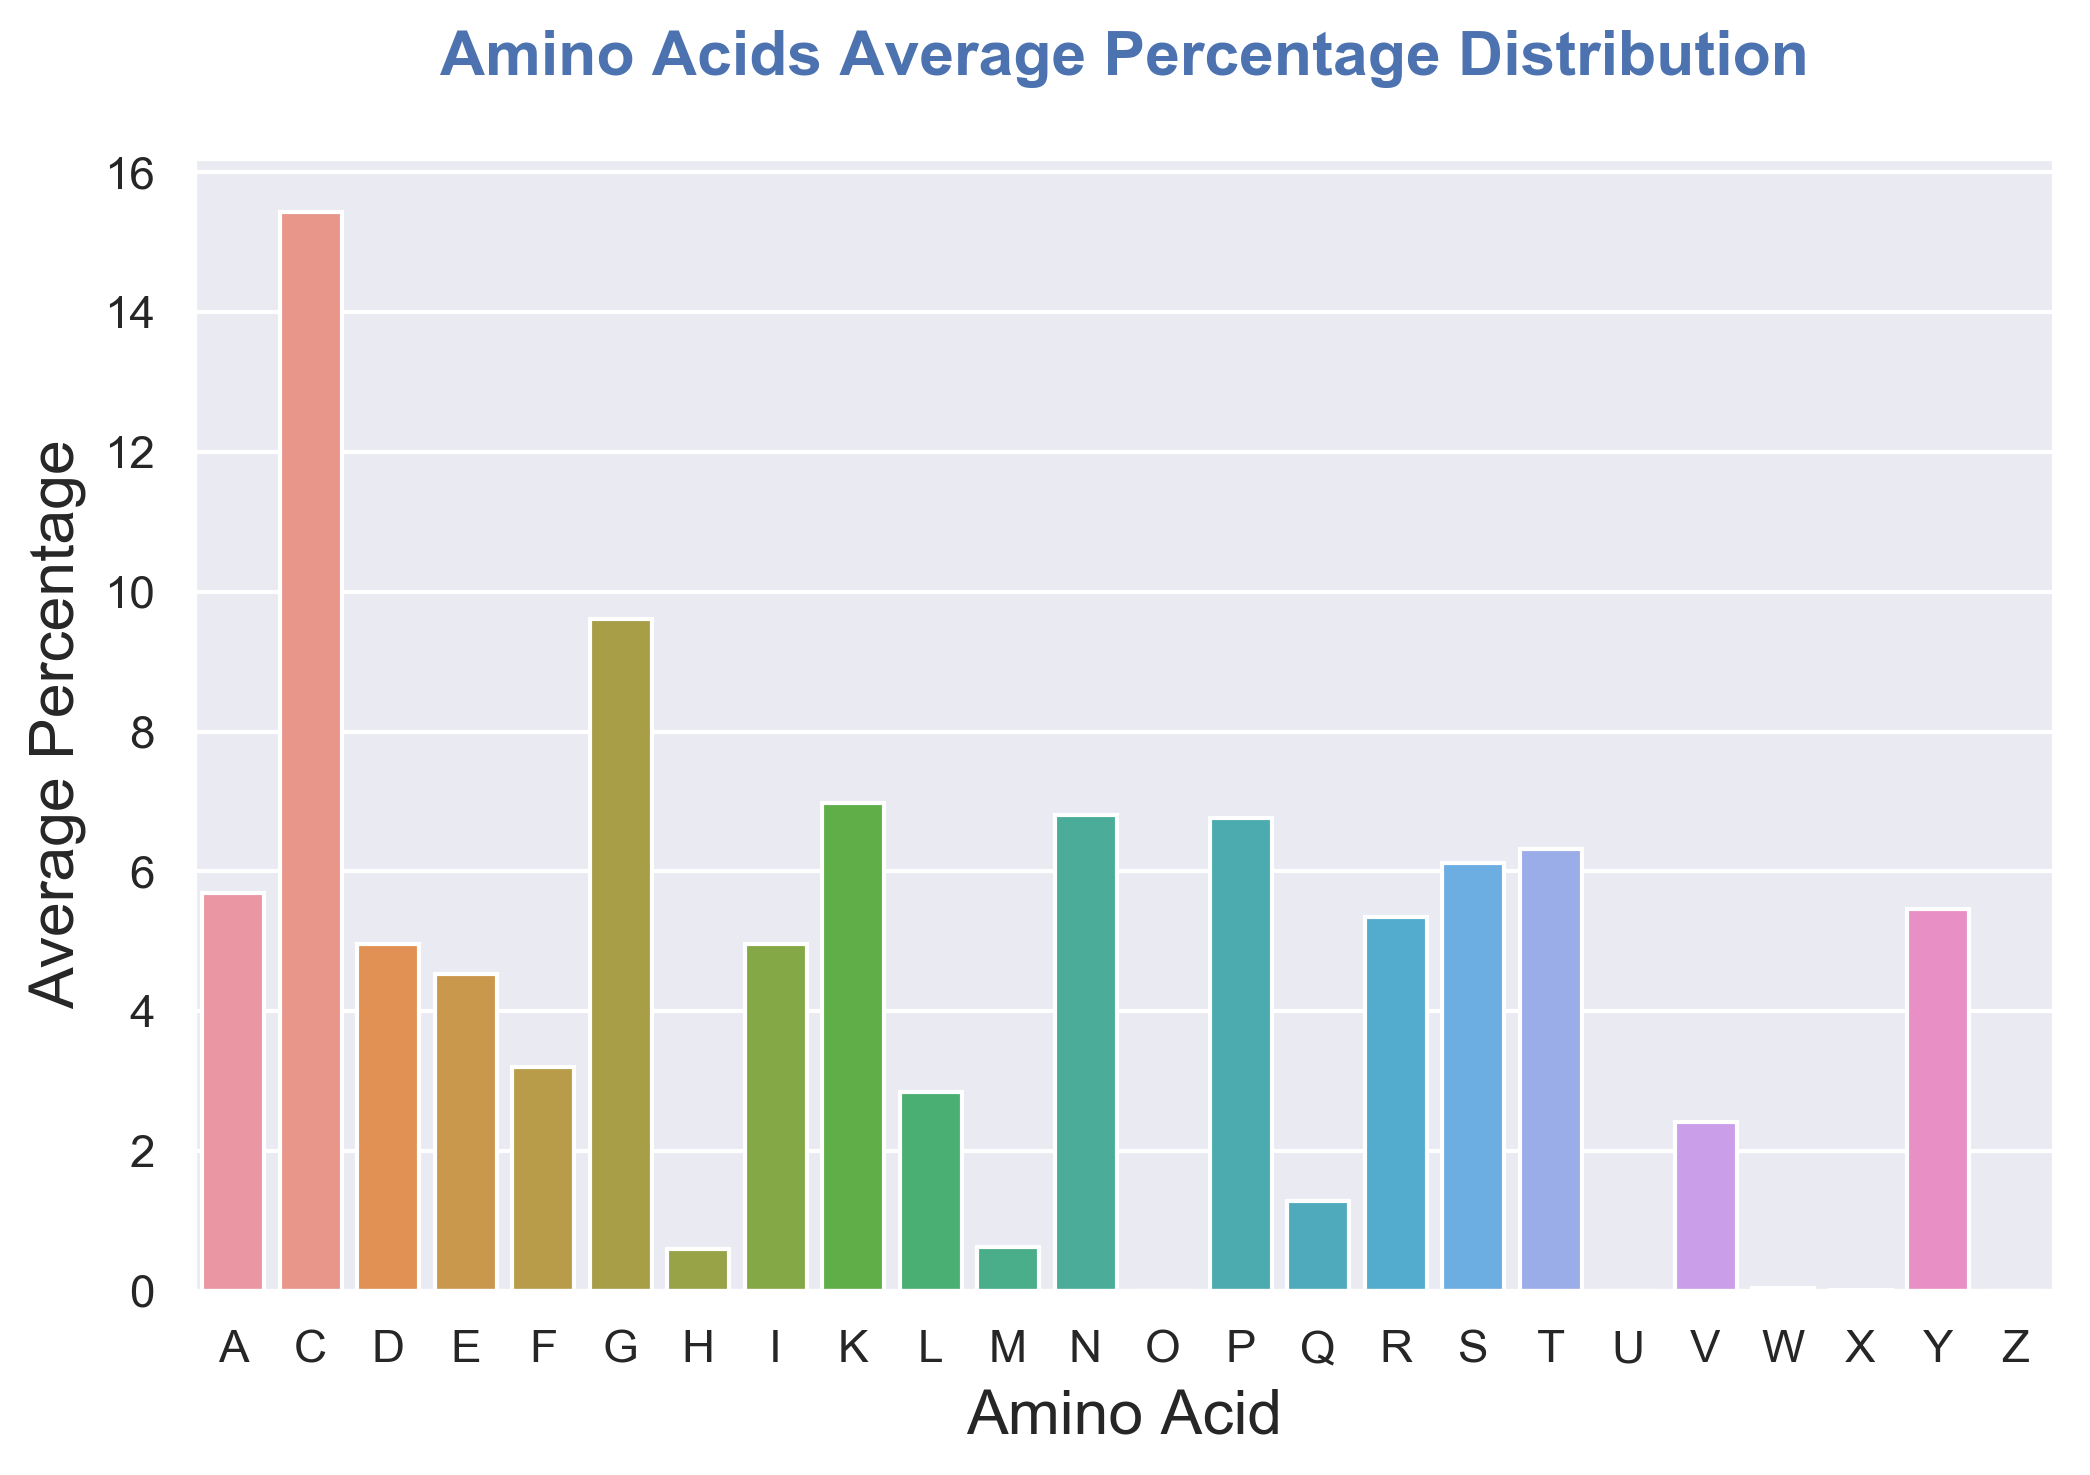

In [218]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Amino Acids Average Percentage Distribution',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Amino Acids',fontdict={'fontsize':15})
plt.ylabel('Average Percentage',fontdict={'fontsize':15})
sns.barplot(x='Amino Acid',y='Average Percentage',data=dom_amino_avgPercentage)

## (3) Reactive Loops (RCL) Data Analysis

In [221]:
# Here we perform different data analysis related to the RCLs

### (3.1) RCL Distribution

In [222]:
# This anlaysis shows the number of times a RCL has been found in the PIN-II PI database. This information can be retreived 
# finding RCL Frequency using Tables Sequence_Domains and Domains.

In [50]:
seq_domain_rcl_linker.columns

Index(['UniprotID', 'Sequence', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID', 'Domain', 'DomainStartPosition',
       'DomainEndPosition', 'DomainType', 'RclID', 'RCL', 'P2Residue',
       'P1Residue', 'P1primeResidue', 'targetProtease', 'tpID',
       'RCL_startPosition', 'RCL_endPosition', 'linkerID', 'Linker',
       'LinkerType', 'Linker_startPosition', 'Linker_endPosition'],
      dtype='object')

In [51]:
seq_rcl=seq_domain_rcl_linker[['UniprotID','OrganismID', 'Organism', 'Genus','RclID', 'RCL']]

In [52]:
seq_rcl.count()

UniprotID     1298
OrganismID    1298
Organism      1298
Genus         1298
RclID         1295
RCL           1295
dtype: int64

In [227]:
rclFreq=seq_rcl.RCL.value_counts()

In [230]:
#rclFreq.to_csv('Website/G3(1)_RCL_Distribution.csv')

In [234]:
rclFreq=pd.read_csv('Website/G3(1)_RCL_Distribution.csv')

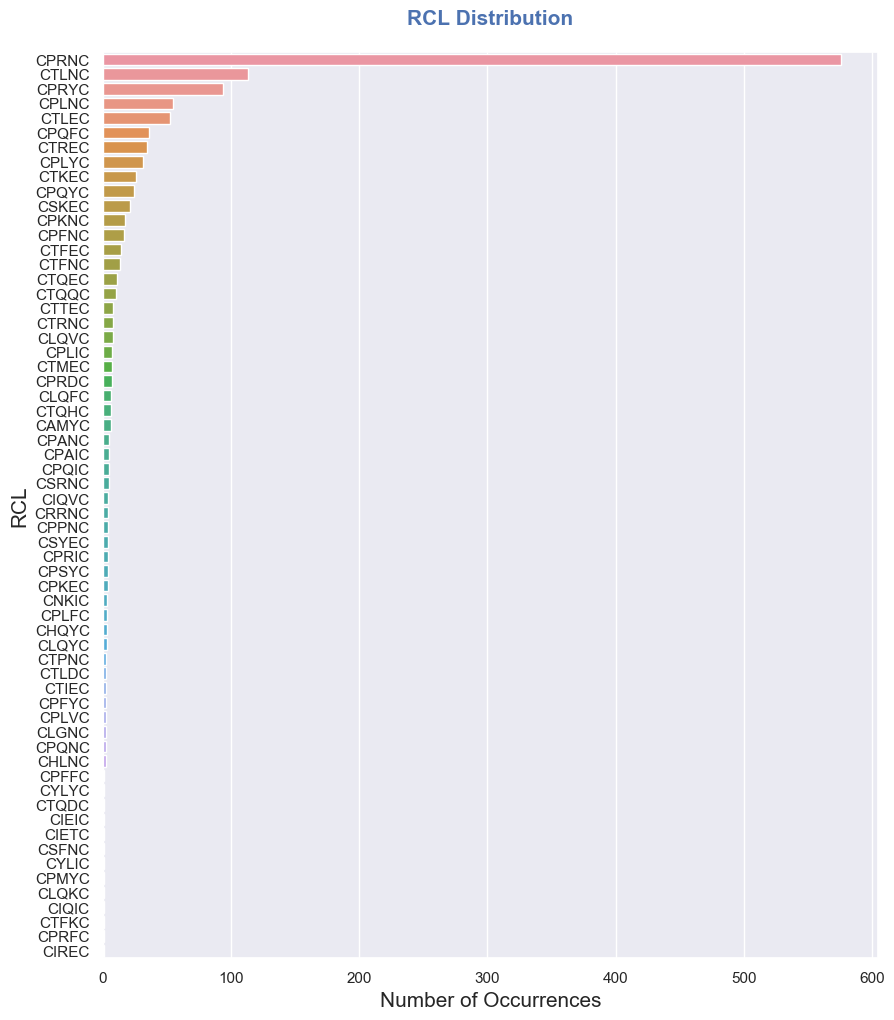

In [235]:
plt.figure(figsize=(10,12),dpi=100)
plt.title('RCL Distribution',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of Occirrences',fontdict={'fontsize':15})
plt.ylabel('RCL',fontdict={'fontsize':15})
g=sns.barplot(x='Number of Occurrences',y='RCL',data=rclFreq)
#g.legend_.remove()

### (3.2) Specie wise distribution of RCL

In [2]:
# To find which RCLs are found in a particular specie and its number of Occurrences. This information can be retreived 
# finding RCL Frequency in species using Tables Sequence_Domains,Taxonomy and Domains.

In [53]:
seq_rcl

UniprotID  OrganismID  \
0         P05119        4081   
1         P05119        4081   
2         P05119        4081   
3         P84813        4113   
4         P01080        4113   
5         P01080        4113   
6         P01080        4113   
7         P01078        4111   
8         P83241        4072   
9         Q41435        4113   
10        Q41435        4113   
11        P56615        4072   
12        Q43710        4081   
13        Q43710        4081   
14        Q43710        4081   
15        Q43710        4081   
16        Q43710        4081   
17        Q43502        4081   
18        Q43502        4081   
19        Q43502        4081   
20        Q43502        4081   
21        Q43502        4081   
22        Q40561        4097   
23        Q40561        4097   
24        Q40561        4097   
25        Q40561        4097   
26        Q40561        4097   
27        Q43652        4113   
28        Q43652        4113   
29        Q43652        4113   
30        Q00782        4113   
31        Q00782        4113   
32        Q00782        4113   
33        Q00782        4113   
34        Q41489        4113   
35        Q41489        4113   
36        Q41488        4113   
37        Q41488        4113   
38        Q41488        4113   
39        O49146        4072   
40        O49146        4072   
41        O49146        4072   
42        O49146        4072   
43        O49146        4072   
44        P01079        4113   
45    A0A1S3YTB5        4097   
46        Q9C7G9        3702   
47    A0A3Q7IU74        4081   
48    A0A3Q7IU74        4081   
49    A0A3Q7IU74        4081   
50    A0A3Q7IU74        4081   
51    A0A3Q7IU74        4081   
52    A0A3Q7IU74        4081   
53    A0A3Q7IU74        4081   
54        A3FMA3        4577   
55    A0A2N9F3Z0       28930   
56    A0A0D3APY5      109376   
57        Q4ZIQ5        4072   
58        Q4ZIQ5        4072   
59        Q4ZIQ5        4072   
60        Q4ZIQ5        4072   
61        Q4ZIQ5        4072   
62        Q4ZIQ5        4072   
63        Q4ZIQ5        4072   
64    A0A2T7C1D7     1504633   
65    A0A068UQ46       49390   
66    A0A1B6Q2N4        4558   
67    A0A2G2X8V0       33114   
68    A0A2G2X8V0       33114   
69    A0A2G2X8V0       33114   
70    A0A2G2X8V0       33114   
71    A0A2G2X8V0       33114   
72        C5WLW2        4558   
73    A0A3B6GR13        4565   
74    A0A2G2V3L6       33114   
75    A0A2G2V3L6       33114   
76    A0A2G2V3L6       33114   
77    A0A2G2V3L6       33114   
78    A0A2G2V3L6       33114   
79    A0A0K9S2T0        3562   
80    A0A2G2WX27       33114   
81        C5XFQ3        4558   
82    A0A2G9H7E3      429701   
83    A0A2G2WDG3       33114   
84    A0A2G9G784      429701   
85    A0A2G3A0U2        4072   
86    A0A2G3A0U2        4072   
87    A0A2G3A0U2        4072   
88    A0A2G3A0U2        4072   
89    A0A2G3A0U2        4072   
90    A0A097J9D5        4072   
91    A0A097J9D5        4072   
92    A0A097J9D5        4072   
93    A0A097J9D5        4072   
94    A0A097J9D5        4072   
95    A0A097J9C5        4072   
96    A0A097J9C5        4072   
97    A0A097J9C5        4072   
98    A0A097J9C5        4072   
99    A0A097J9C5        4072   
100   A0A1U7Y2F0        4096   
101   A0A1U7Y2F0        4096   
102   A0A1U7Y2F0        4096   
103   A0A1U7Y2F0        4096   
104   A0A1U7Y2F0        4096   
105   A0A1U7Y2F0        4096   
106   A0A1U7Y2F0        4096   
107   A0A1U7Y2F0        4096   
108   A0A1U7Y2F0        4096   
109   A0A1U7Y2F0        4096   
110   A0A1U7Y2F0        4096   
111   A0A1U7Y2F0        4096   
112   A0A1U7Y2F0        4096   
113   A0A1U7XB93        4096   
114   A0A1U7XB93        4096   
115   A0A1U7XB93        4096   
116   A0A1U7XB93        4096   
117   A0A1U7XB93        4096   
118   A0A2G3C8B9       80379   
119       W9RZD9      981085   
120       Q1WL44        4096   
121       Q1WL44        4096   
122       Q1WL44        4096   
123       Q1WL44        4096   
124    

In [54]:
org_rcl=seq_rcl[['OrganismID','RclID','RCL']]

In [55]:
taxon_species

Taxon                         Scientific name
0      52838                         Musa balbisiana
1      38414                      Eragrostis curvula
2      15368                 Brachypodium distachyon
3    1088818                   Apostasia shenzhenica
4     906689                    Dendrobium catenatum
5     542762         Camellia sinensis var. sinensis
6      33113                       Atropa belladonna
7       4081                    Solanum lycopersicum
8       4072                         Capsicum annuum
9      33114                       Capsicum baccatum
10      4108                       Solanum chacoense
11      4093                       Nicotiana rustica
12      4096                    Nicotiana sylvestris
13     80379                       Capsicum chinense
14      4111                       Solanum melongena
15      4097                       Nicotiana tabacum
16      4100                   Nicotiana benthamiana
17      4112                          Solanum nigrum
18     35889                     Nicotiana glutinosa
19     49451                     Nicotiana attenuata
20      4113                       Solanum tuberosum
21     76336                       Nicotiana repanda
22     81866                   Nicotiana clevelandii
23    118690                      Nicotiana cavicola
24    118701                      Nicotiana linearis
25    118703                  Nicotiana megalosiphon
26    118704                       Nicotiana miersii
27    118709                      Nicotiana simulans
28    118712                     Nicotiana umbratica
29    109975                      Solanum americanum
30    200300                   Nicotiana spegazzinii
31    200301                     Nicotiana corymbosa
32    200306  Nicotiana occidentalis subsp. hesperis
33    200315                    Nicotiana pauciflora
34    200316                   Nicotiana obtusifolia
35    172790                         Solanum phureja
36    278839                  Nicotiana quadrivalvis
37      4086                     Nicotiana acuminata
38      4087                         Nicotiana alata
39      4146                           Olea europaea
40    429701              Handroanthus impetiginosus
41    192259                          Genlisea aurea
42     28930                         Fagus sylvatica
43     51240                           Juglans regia
44      3694                     Populus trichocarpa
45      3988                        Ricinus communis
46     43335                            Populus alba
47      3983                       Manihot esculenta
48    180498                         Jatropha curcas
49      3476                   Parasponia andersonii
50     63057                         Trema orientale
51    981085                         Morus notabilis
52      3755                           Prunus dulcis
53      3760                          Prunus persica
54     74649                          Rosa chinensis
55      3702                    Arabidopsis thaliana
56     81972        Arabidopsis lyrata subsp. lyrata
57     81985                        Capsella rubella
58      3711                     Brassica campestris
59     51351         Brassica rapa subsp. pekinensis
60      3712                       Brassica oleracea
61    109376         Brassica oleracea var. oleracea
62     69181                        Brassica cretica
63    107243                    Noccaea caerulescens
64     22663                         Punica granatum
65      4155                     Erythranthe guttata
66     88036              Selaginella moellendorffii
67      4529                         Oryza rufipogon
68      4536                            Oryza nivara
69     39946              Oryza sativa subsp. indica
70     39947            Oryza sativa subsp. japonica
71      4533                       Oryza brachyantha
72      4537                          Oryza punctata
73      4538                        Oryza glaberrima
74     40148                    

In [56]:
species_rcl=pd.merge(org_rcl,taxon_species,left_on='OrganismID',right_on='Taxon',how='left')

In [57]:
species_rcl=species_rcl[['OrganismID','Scientific name','RclID','RCL']]

In [58]:
species_rcl

OrganismID                         Scientific name  RclID    RCL
0           4081                    Solanum lycopersicum   RL-7  CTFNC
1           4081                    Solanum lycopersicum   RL-7  CTFNC
2           4081                    Solanum lycopersicum   RL-4  CTREC
3           4113                       Solanum tuberosum   RL-2  CPLNC
4           4113                       Solanum tuberosum   RL-2  CPLNC
5           4113                       Solanum tuberosum  RL-48  CIREC
6           4113                       Solanum tuberosum   RL-2  CPLNC
7           4111                       Solanum melongena   RL-1  CPRNC
8           4072                         Capsicum annuum   RL-1  CPRNC
9           4113                       Solanum tuberosum   RL-2  CPLNC
10          4113                       Solanum tuberosum   RL-2  CPLNC
11          4072                         Capsicum annuum   RL-6  CPRYC
12          4081                    Solanum lycopersicum  RL-10  CTKEC
13          4081                    Solanum lycopersicum  RL-10  CTKEC
14          4081                    Solanum lycopersicum  RL-10  CTKEC
15          4081                    Solanum lycopersicum  RL-10  CTKEC
16          4081                    Solanum lycopersicum  RL-10  CTKEC
17          4081                    Solanum lycopersicum  RL-10  CTKEC
18          4081                    Solanum lycopersicum  RL-46  CPSYC
19          4081                    Solanum lycopersicum  RL-10  CTKEC
20          4081                    Solanum lycopersicum  RL-10  CTKEC
21          4081                    Solanum lycopersicum  RL-46  CPSYC
22          4097                       Nicotiana tabacum  RL-24  CTTEC
23          4097                       Nicotiana tabacum  RL-12  CPQFC
24          4097                       Nicotiana tabacum  RL-24  CTTEC
25          4097                       Nicotiana tabacum  RL-10  CTKEC
26          4097                       Nicotiana tabacum  RL-12  CPQFC
27          4113                       Solanum tuberosum  RL-10  CTKEC
28          4113                       Solanum tuberosum   RL-2  CPLNC
29          4113                       Solanum tuberosum   RL-2  CPLNC
30          4113                       Solanum tuberosum   RL-9  CTLEC
31          4113                       Solanum tuberosum   RL-1  CPRNC
32          4113                       Solanum tuberosum   RL-9  CTLEC
33          4113                       Solanum tuberosum   RL-1  CPRNC
34          4113                       Solanum tuberosum   RL-2  CPLNC
35          4113                       Solanum tuberosum   RL-2  CPLNC
36          4113                       Solanum tuberosum   RL-1  CPRNC
37          4113                       Solanum tuberosum   RL-9  CTLEC
38          4113                       Solanum tuberosum   RL-1  CPRNC
39          4072                         Capsicum annuum   RL-3  CTLNC
40          4072                         Capsicum annuum   RL-3  CTLNC
41          4072                         Capsicum annuum  RL-11  CPKNC
42          4072                         Capsicum annuum   RL-3  CTLNC
43          4072                         Capsicum annuum   RL-3  CTLNC
44          4113                       Solanum tuberosum   RL-1  CPRNC
45          4097                       Nicotiana tabacum  RL-37  CLQFC
46          3702                    Arabidopsis thaliana  RL-27  CPLYC
47          4081                    Solanum lycopersicum   RL-1  CPRNC
48          4081                    Solanum lycopersicum   RL-5  CPFNC
49          4081                    Solanum lycopersicum   RL-1  CPRNC
50          4081                    Solanum lycopersicum    NaN    NaN
51          4081                    Solanum lycopersicum   RL-1  CPRNC
52          4081                    Solanum lycopersicum   RL-1  CPRNC
53          4081                    Solanum lycopersicum   RL-5  CPFNC
54          4577                                Zea mays  RL-12  CPQFC
55         28930              

In [251]:
species_rcl.groupby('Scientific name').RCL.value_counts()

Scientific name                         RCL  
Aegilops tauschii                       CHQYC      1
Aegilops tauschii subsp. strangulata    CHQYC      1
                                        CPQYC      1
Ananas comosus                          CPQYC      2
Apostasia shenzhenica                   CPLYC      1
Arabidopsis lyrata subsp. lyrata        CPLYC      1
Arabidopsis thaliana                    CPLYC      2
Brachypodium distachyon                 CPQYC      1
Brassica campestris                     CPLYC      1
Brassica cretica                        CPLYC      1
Brassica oleracea                       CPLYC      1
Brassica oleracea var. oleracea         CPLYC      1
Brassica rapa subsp. pekinensis         CPLYC      1
Capsella rubella                        CPLYC      1
Capsicum annuum                         CPRNC    188
                                        CPRYC     88
                                        CTLNC     81
                                        CTLEC     16


In [253]:
#species_rcl.groupby('Scientific name').RCL.value_counts().to_csv('Website/G3(2)_RCL_OccurrencesIn_Specie.csv')

In [59]:
specie_rcl=pd.read_csv('Website/G3(2)_RCL_OccurrencesIn_Specie.csv')

In [60]:
specie_rcl

Specie    RCL  Occurrences
0                         Aegilops tauschii  CHQYC            1
1      Aegilops tauschii subsp. strangulata  CHQYC            1
2      Aegilops tauschii subsp. strangulata  CPQYC            1
3                            Ananas comosus  CPQYC            2
4                     Apostasia shenzhenica  CPLYC            1
5          Arabidopsis lyrata subsp. lyrata  CPLYC            1
6                      Arabidopsis thaliana  CPLYC            2
7                   Brachypodium distachyon  CPQYC            1
8                       Brassica campestris  CPLYC            1
9                          Brassica cretica  CPLYC            1
10                        Brassica oleracea  CPLYC            1
11          Brassica oleracea var. oleracea  CPLYC            1
12          Brassica rapa subsp. pekinensis  CPLYC            1
13                         Capsella rubella  CPLYC            1
14                          Capsicum annuum  CPRNC          188
15                          Capsicum annuum  CPRYC           88
16                          Capsicum annuum  CTLNC           81
17                          Capsicum annuum  CTLEC           16
18                          Capsicum annuum  CPKNC           12
19                          Capsicum annuum  CTREC            6
20                          Capsicum annuum  CTQEC            4
21                          Capsicum annuum  CTQHC            4
22                          Capsicum annuum  CSRNC            3
23                          Capsicum annuum  CIQVC            2
24                          Capsicum annuum  CLQVC            2
25                          Capsicum annuum  CPQFC            2
26                          Capsicum annuum  CTKEC            2
27                          Capsicum annuum  CTMEC            2
28                          Capsicum annuum  CTPNC            2
29                          Capsicum annuum  CPQIC            1
30                          Capsicum annuum  CPRDC            1
31                        Capsicum baccatum  CPRNC            5
32                        Capsicum baccatum  CPRYC            4
33                        Capsicum baccatum  CTLEC            4
34                        Capsicum baccatum  CLGNC            2
35                        Capsicum baccatum  CPAIC            2
36                        Capsicum baccatum  CPANC            2
37                        Capsicum baccatum  CTKEC            2
38                        Capsicum baccatum  CTLDC            2
39                        Capsicum baccatum  CTQEC            2
40                        Capsicum baccatum  CIQVC            1
41                        Capsicum baccatum  CLQFC            1
42                        Capsicum baccatum  CLQVC            1
43                        Capsicum baccatum  CPKNC            1
44                        Capsicum baccatum  CPQFC            1
45                        Capsicum baccatum  CPQIC            1
46                        Capsicum baccatum  CPRDC            1
47                        Capsicum baccatum  CTREC            1
48                        Capsicum chinense  CPRNC           10
49                        Capsicum chinense  CTLNC            5
50                        Capsicum chinense  CTLEC            4
51                        Capsicum chinense  CPAIC            3
52                        Capsicum chinense  CPANC            3
53                        Capsicum chinense  CPRYC            2
54                        Capsicum chinense  CSRNC            2
55                        Capsicum chinense  CTKEC            2
56                        Capsicum chinense  CTQEC            2
57                        Capsicum chinense  CTQHC            2
58                        Capsicum chinense  CIQVC            1
59                        Capsicum chinense  CLQFC            1
60                        Capsicum chinense  CLQVC            1
61                        Capsicum chinense  CPKNC            1
62   

In [257]:
specie_rcl_pivot=pd.pivot_table(data=specie_rcl,index='Specie',columns='RCL',values='Occurrences',aggfunc=sum,fill_value=0)

In [258]:
specie_rcl_pivot

RCL                                     CAMYC  CHLNC  CHQYC  CIEIC  CIETC  \
Specie                                                                      
Aegilops tauschii                           0      0      1      0      0   
Aegilops tauschii subsp. strangulata        0      0      1      0      0   
Ananas comosus                              0      0      0      0      0   
Apostasia shenzhenica                       0      0      0      0      0   
Arabidopsis lyrata subsp. lyrata            0      0      0      0      0   
Arabidopsis thaliana                        0      0      0      0      0   
Brachypodium distachyon                     0      0      0      0      0   
Brassica campestris                         0      0      0      0      0   
Brassica cretica                            0      0      0      0      0   
Brassica oleracea                           0      0      0      0      0   
Brassica oleracea var. oleracea             0      0      0      0      0   
Brassica rapa subsp. pekinensis             0      0      0      0      0   
Capsella rubella                            0      0      0      0      0   
Capsicum annuum                             0      0      0      0      0   
Capsicum baccatum                           0      0      0      0      0   
Capsicum chinense                           0      0      0      0      0   
Cicer arietinum                             0      0      0      0      0   
Coffea canephora                            0      0      0      0      0   
Cuscuta australis                           0      0      0      0      0   
Cuscuta campestris                          0      0      0      0      0   
Daucus carota subsp. sativus                0      0      0      0      0   
Dendrobium catenatum                        0      0      0      0      0   
Dichanthelium oligosanthes                  0      0      0      0      0   
Dorcoceras hygrometricum                    0      0      0      0      0   
Erythranthe guttata                         0      0      0      0      0   
Eucalyptus grandis                          0      0      0      0      0   
Fagus sylvatica                             0      0      0      0      0   
Genlisea aurea                              0      0      0      0      0   
Handroanthus impetiginosus                  0      0      0      0      0   
Hordeum vulgare subsp. vulgare              0      0      0      0      0   
Jatropha curcas                             0      0      0      0      0   
Juglans regia                               0      0      0      0      0   
Leersia perrieri                            0      0      0      0      0   
Manihot esculenta                           0      0      0      0      0   
Medicago truncatula                         0      0      0      0      0   
Morus notabilis                             0      0      0      0      0   
Mucuna pruriens                             0      0      0      0      0   
Nicotiana acuminata                         0      0      0      0      0   
Nicotiana alata                             0      0      0      0      0   
Nicotiana attenuata                         0      0      0      0      0   
Nicotiana benthamiana                       0      0      0      0      0   
Nicotiana cavicola                          0      0      0      0      0   
Nicotiana clevelandii                       0      0      0      0      0   
Nicotiana corymbosa                         0      0      0      0      0   
Nicotiana glutinosa                         0      0      0      0      0   
Nicotiana linearis                          0      0      0      0      0   
Nicotiana megalosiphon                      0      0      0      0      0   
Nicotiana miersii                           0      0      0      0      0   
Nicotiana obtusifolia                       0      0      0      0      0   
Nicotiana occidentalis subsp. hesperis      0      0      0      0      0

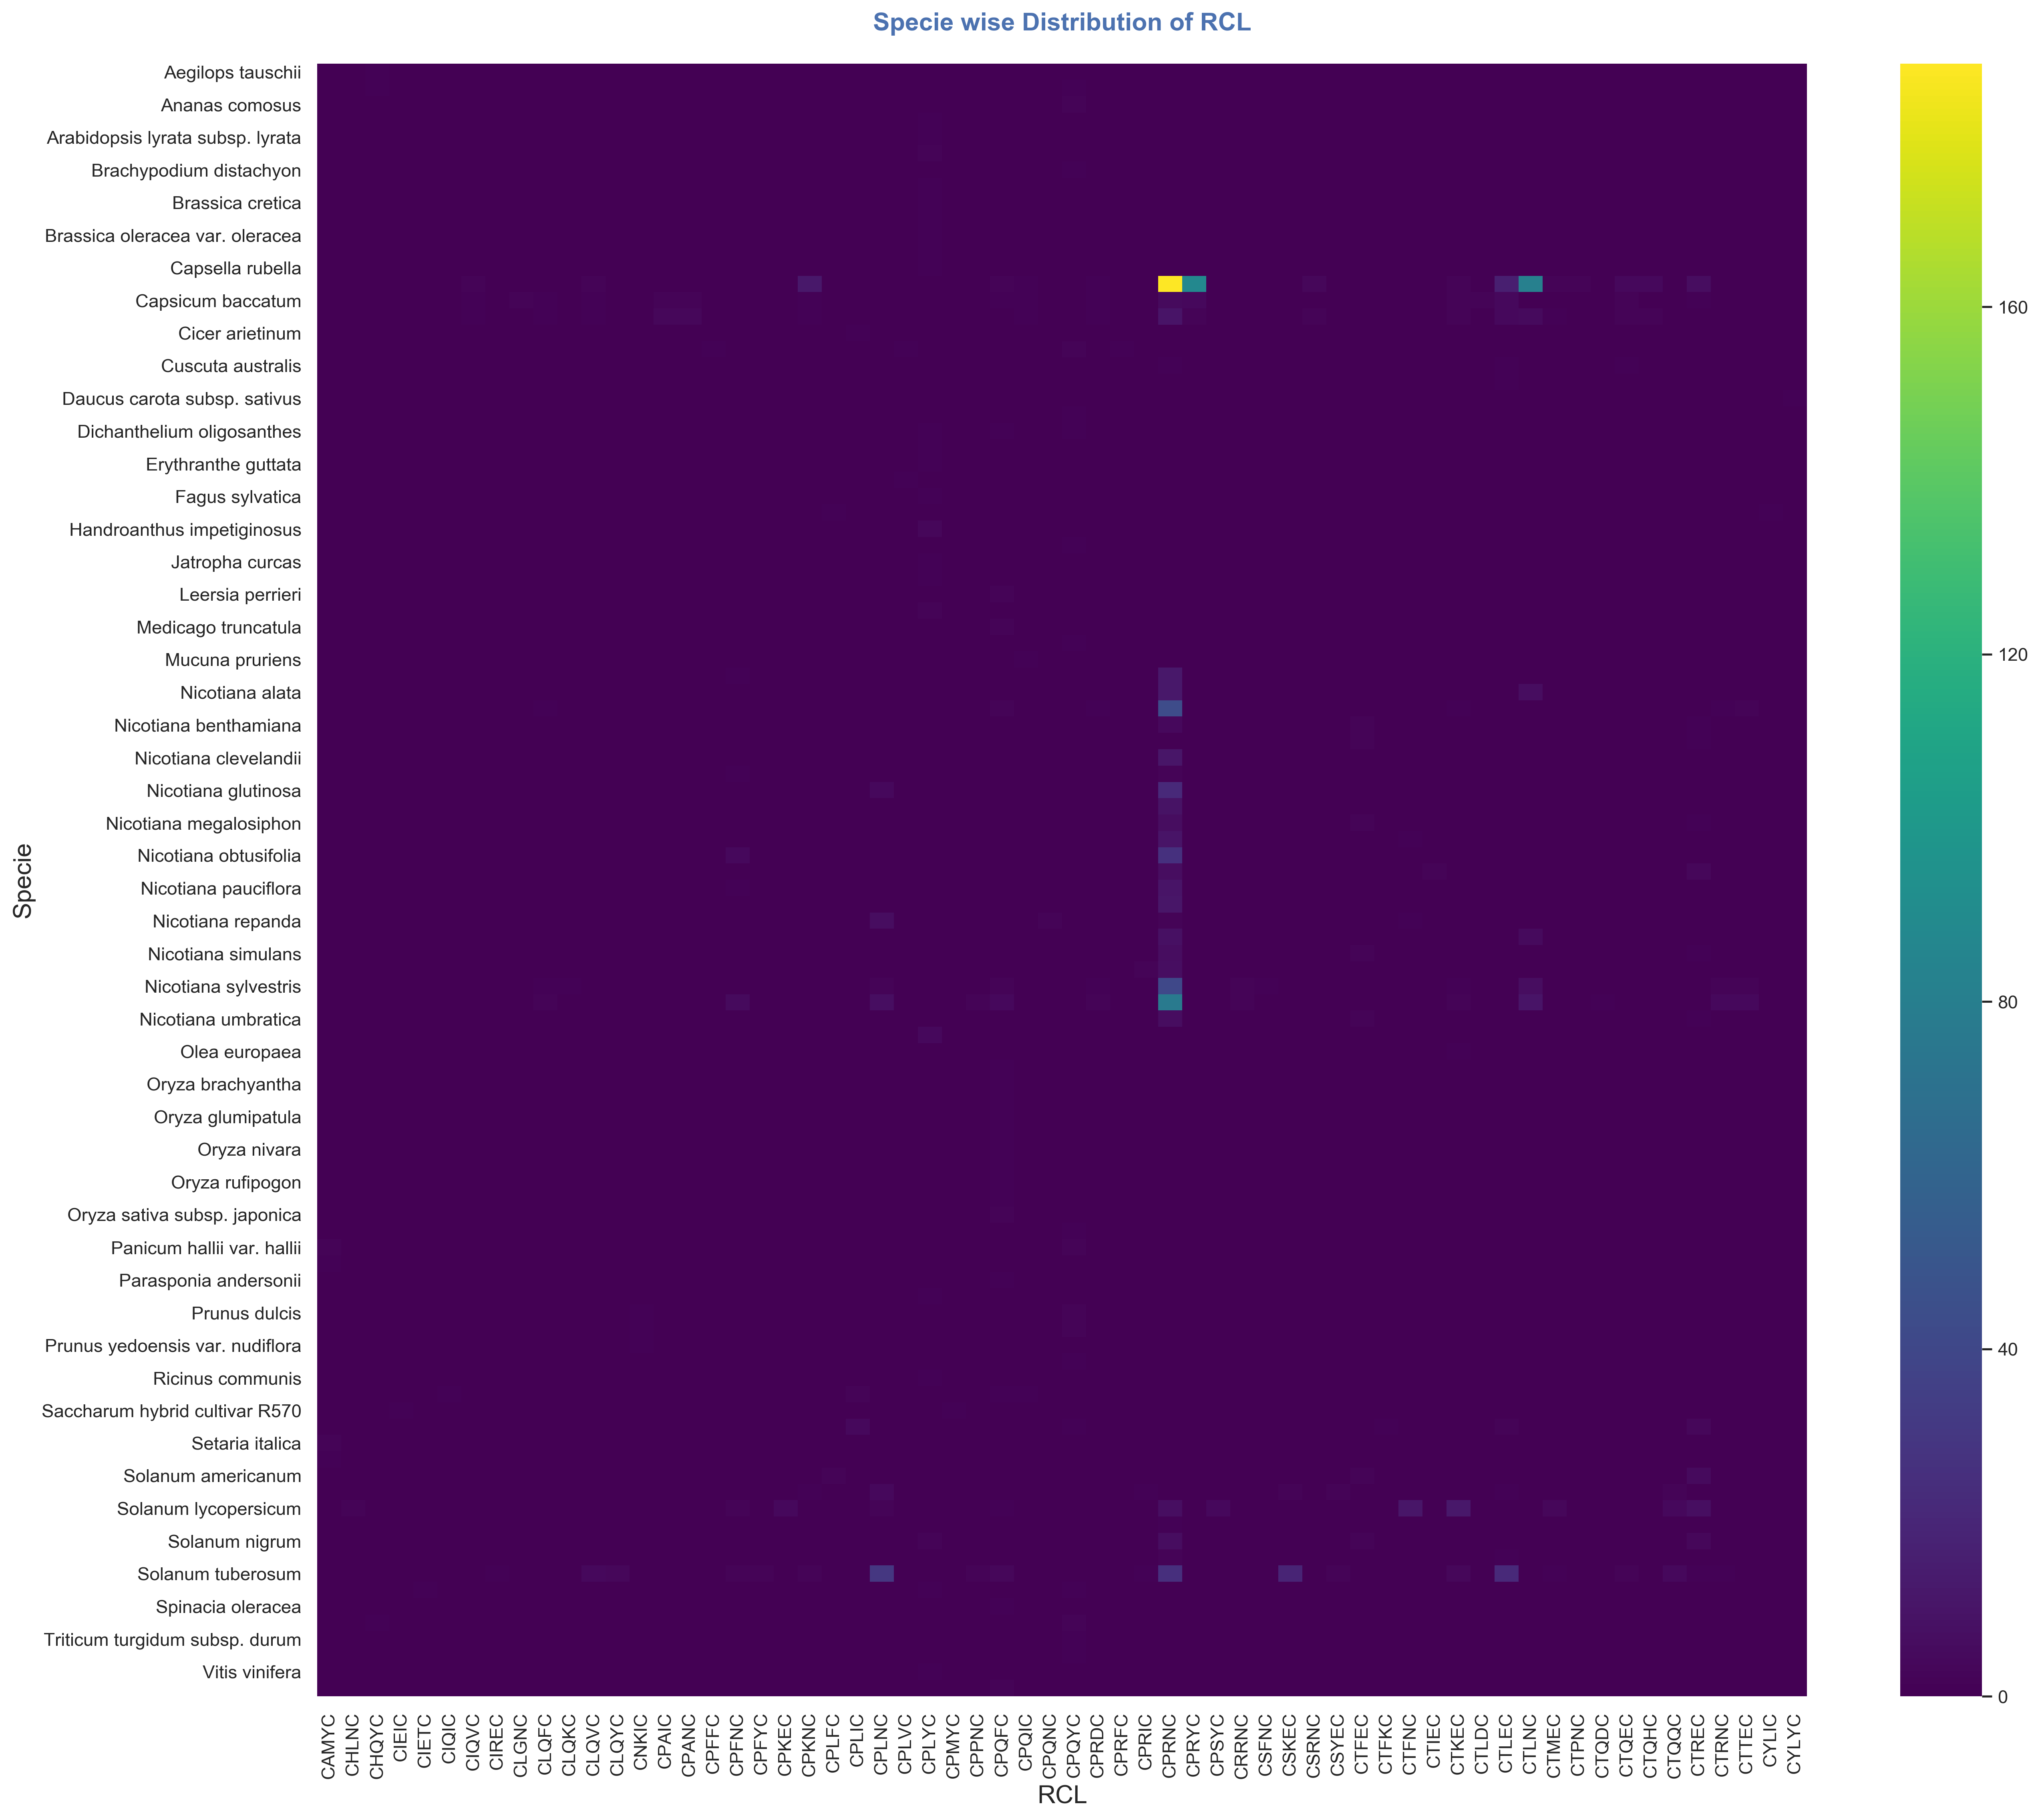

In [259]:
plt.figure(figsize=(20,18),dpi=300)
plt.title('Specie wise Distribution of RCL',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('RCL',fontdict={'fontsize':15})
plt.ylabel('Specie',fontdict={'fontsize':15})

sns.heatmap(specie_rcl_pivot,cmap='viridis')

# (3.3) Specie wise distribution of RCL in Top 10 Species.

In [ ]:
# To find which RCLs are found in Top 10 species and its number of Occurrences. This information can be retreived 
# finding RCL Frequency in species using Tables Sequence_Domains,Taxonomy and Domains. Top 10 species are determined by
# Species Distribution i.e. to which species maximum number of PIs belong to. 

In [41]:
species_distribution=pd.read_csv('Website/G1(1)_SpeciesDistribution.csv')

In [45]:
species_distribution.sort_values('Number of PIs',ascending=False,inplace=True)

In [47]:
top10Species=species_distribution['Specie'].head(10)

In [48]:
top10Species

16                Capsicum annuum
100             Solanum tuberosum
63              Nicotiana tabacum
96           Solanum lycopersicum
18              Capsicum chinense
17              Capsicum baccatum
45            Nicotiana attenuata
62           Nicotiana sylvestris
91     Selaginella moellendorffii
20               Coffea canephora
Name: Specie, dtype: object

In [61]:
specie_rcl

Specie    RCL  Occurrences
0                         Aegilops tauschii  CHQYC            1
1      Aegilops tauschii subsp. strangulata  CHQYC            1
2      Aegilops tauschii subsp. strangulata  CPQYC            1
3                            Ananas comosus  CPQYC            2
4                     Apostasia shenzhenica  CPLYC            1
5          Arabidopsis lyrata subsp. lyrata  CPLYC            1
6                      Arabidopsis thaliana  CPLYC            2
7                   Brachypodium distachyon  CPQYC            1
8                       Brassica campestris  CPLYC            1
9                          Brassica cretica  CPLYC            1
10                        Brassica oleracea  CPLYC            1
11          Brassica oleracea var. oleracea  CPLYC            1
12          Brassica rapa subsp. pekinensis  CPLYC            1
13                         Capsella rubella  CPLYC            1
14                          Capsicum annuum  CPRNC          188
15                          Capsicum annuum  CPRYC           88
16                          Capsicum annuum  CTLNC           81
17                          Capsicum annuum  CTLEC           16
18                          Capsicum annuum  CPKNC           12
19                          Capsicum annuum  CTREC            6
20                          Capsicum annuum  CTQEC            4
21                          Capsicum annuum  CTQHC            4
22                          Capsicum annuum  CSRNC            3
23                          Capsicum annuum  CIQVC            2
24                          Capsicum annuum  CLQVC            2
25                          Capsicum annuum  CPQFC            2
26                          Capsicum annuum  CTKEC            2
27                          Capsicum annuum  CTMEC            2
28                          Capsicum annuum  CTPNC            2
29                          Capsicum annuum  CPQIC            1
30                          Capsicum annuum  CPRDC            1
31                        Capsicum baccatum  CPRNC            5
32                        Capsicum baccatum  CPRYC            4
33                        Capsicum baccatum  CTLEC            4
34                        Capsicum baccatum  CLGNC            2
35                        Capsicum baccatum  CPAIC            2
36                        Capsicum baccatum  CPANC            2
37                        Capsicum baccatum  CTKEC            2
38                        Capsicum baccatum  CTLDC            2
39                        Capsicum baccatum  CTQEC            2
40                        Capsicum baccatum  CIQVC            1
41                        Capsicum baccatum  CLQFC            1
42                        Capsicum baccatum  CLQVC            1
43                        Capsicum baccatum  CPKNC            1
44                        Capsicum baccatum  CPQFC            1
45                        Capsicum baccatum  CPQIC            1
46                        Capsicum baccatum  CPRDC            1
47                        Capsicum baccatum  CTREC            1
48                        Capsicum chinense  CPRNC           10
49                        Capsicum chinense  CTLNC            5
50                        Capsicum chinense  CTLEC            4
51                        Capsicum chinense  CPAIC            3
52                        Capsicum chinense  CPANC            3
53                        Capsicum chinense  CPRYC            2
54                        Capsicum chinense  CSRNC            2
55                        Capsicum chinense  CTKEC            2
56                        Capsicum chinense  CTQEC            2
57                        Capsicum chinense  CTQHC            2
58                        Capsicum chinense  CIQVC            1
59                        Capsicum chinense  CLQFC            1
60                        Capsicum chinense  CLQVC            1
61                        Capsicum chinense  CPKNC            1
62   

In [62]:
specie_rcl_top10=specie_rcl.loc[specie_rcl.Specie.isin(top10Species),:]

In [64]:
specie_rcl_top10.Specie.unique()

array(['Capsicum annuum', 'Capsicum baccatum', 'Capsicum chinense',
       'Coffea canephora', 'Nicotiana attenuata', 'Nicotiana sylvestris',
       'Nicotiana tabacum', 'Selaginella moellendorffii',
       'Solanum lycopersicum', 'Solanum tuberosum'], dtype=object)

In [65]:
specieTop10_rcl_pivot=pd.pivot_table(data=specie_rcl_top10,index='Specie',columns='RCL',values='Occurrences',aggfunc=sum,fill_value=0)

### (3.3) Genus wise distribution of RCL

In [3]:
# To find which RCLs are found in a particular Genus and its number of Occurrences. This information can be retreived 
# finding RCL Frequency in Genus using Tables Sequence_Domains,Taxonomy and Domains.

In [19]:
seq_rcl.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'RclID', 'RCL'], dtype='object')

In [20]:
genus_rcl=seq_rcl[['Genus', 'RclID', 'RCL']]

In [22]:
genus_rcl.count()

Genus    1298
RclID    1295
RCL      1295
dtype: int64

In [24]:
genus_rcl.groupby('Genus').RCL.value_counts()

Genus          RCL  
Aegilops       CHQYC      2
               CPQYC      1
Ananas         CPQYC      2
Apostasia      CPLYC      1
Arabidopsis    CPLYC      3
Brachypodium   CPQYC      1
Brassica       CPLYC      5
Capsella       CPLYC      1
Capsicum       CPRNC    203
               CPRYC     94
               CTLNC     86
               CTLEC     24
               CPKNC     14
               CTQEC      8
               CTREC      7
               CTKEC      6
               CTQHC      6
               CPAIC      5
               CPANC      5
               CSRNC      5
               CIQVC      4
               CLQVC      4
               CPQFC      3
               CPQIC      3
               CPRDC      3
               CTMEC      3
               CLGNC      2
               CLQFC      2
               CTLDC      2
               CTPNC      2
Cicer          CPLIC      1
Coffea         CPQYC      2
               CPFFC      1
               CPLVC      1
               CPRFC      1

In [26]:
#genus_rcl.groupby('Genus').RCL.value_counts().to_csv('Website/G3(3)_RCL_OccurrencesIn_Genus.csv')

In [29]:
genus_rcl=pd.read_csv('Website/G3(3)_RCL_OccurrencesIn_Genus.csv')

In [30]:
genus_rcl

Genus    RCL  Occurrences
0         Aegilops  CHQYC            2
1         Aegilops  CPQYC            1
2           Ananas  CPQYC            2
3        Apostasia  CPLYC            1
4      Arabidopsis  CPLYC            3
5     Brachypodium  CPQYC            1
6         Brassica  CPLYC            5
7         Capsella  CPLYC            1
8         Capsicum  CPRNC          203
9         Capsicum  CPRYC           94
10        Capsicum  CTLNC           86
11        Capsicum  CTLEC           24
12        Capsicum  CPKNC           14
13        Capsicum  CTQEC            8
14        Capsicum  CTREC            7
15        Capsicum  CTKEC            6
16        Capsicum  CTQHC            6
17        Capsicum  CPAIC            5
18        Capsicum  CPANC            5
19        Capsicum  CSRNC            5
20        Capsicum  CIQVC            4
21        Capsicum  CLQVC            4
22        Capsicum  CPQFC            3
23        Capsicum  CPQIC            3
24        Capsicum  CPRDC            3
25        Capsicum  CTMEC            3
26        Capsicum  CLGNC            2
27        Capsicum  CLQFC            2
28        Capsicum  CTLDC            2
29        Capsicum  CTPNC            2
30           Cicer  CPLIC            1
31          Coffea  CPQYC            2
32          Coffea  CPFFC            1
33          Coffea  CPLVC            1
34          Coffea  CPRFC            1
35         Cuscuta  CTLEC            2
36         Cuscuta  CPRNC            1
37         Cuscuta  CTQEC            1
38          Daucus  CYLYC            1
39      Dendrobium  CPQYC            1
40   Dichanthelium  CPLYC            1
41   Dichanthelium  CPQFC            1
42   Dichanthelium  CPQYC            1
43      Dorcoceras  CPLYC            1
44     Erythranthe  CPLYC            1
45      Eucalyptus  CPLVC            1
46           Fagus  CPLYC            1
47        Genlisea  CPLFC            1
48        Genlisea  CYLIC            1
49    Handroanthus  CPLYC            3
50         Hordeum  CPQYC            1
51        Jatropha  CPLYC            1
52         Juglans  CPLYC            1
53         Leersia  CPQFC            2
54         Manihot  CPLYC            2
55        Medicago  CPQFC            2
56           Morus  CPQYC            1
57          Mucuna  CPQIC            1
58       Nicotiana  CPRNC          331
59       Nicotiana  CTLNC           27
60       Nicotiana  CPLNC           19
61       Nicotiana  CPFNC           12
62       Nicotiana  CTFEC           10
63       Nicotiana  CPQFC            8
64       Nicotiana  CTREC            8
65       Nicotiana  CTTEC            8
66       Nicotiana  CTRNC            7
67       Nicotiana  CLQFC            4
68       Nicotiana  CPRDC            4
69       Nicotiana  CRRNC            4
70       Nicotiana  CTKEC            4
71       Nicotiana  CPPNC            2
72       Nicotiana  CPQNC            2
73       Nicotiana  CPRIC            2
74       Nicotiana  CTFNC            2
75       Nicotiana  CTIEC            2
76       Nicotiana  CLQKC            1
77       Nicotiana  CSFNC            1
78       Nicotiana  CTQDC            1
79         Noccaea  CPLYC            4
80            Olea  CTKEC            1
81           Oryza  CPQFC           11
82         Panicum  CAMYC            3
83         Panicum  CPQYC            3
84      Parasponia  CPQFC            1
85         Populus  CPLYC            1
86          Prunus  CPQYC            4
87          Prunus  CNKIC            3
88          Punica  CPQYC            1
89         Ricinus  CPLYC            1
90            Rosa  CPLIC            2
91            Rosa  CIQIC            1
92            Rosa  CPQFC            1
93            Rosa  CPQIC            1
94       Saccharum  CIEIC            1
95       Saccharum  CPMYC            1
96     Selaginella  CPLIC            4
97     Selaginella  CTREC            3
98     Selaginella  CTLEC            2
99     Selaginella  CPQYC            1
100    Selaginella  CTFKC            1
101        Setaria  CAMYC          

In [31]:
genus_rcl_pivot=pd.pivot_table(data=genus_rcl,index='Genus',columns='RCL',values='Occurrences',aggfunc=sum,fill_value=0)

In [32]:
genus_rcl_pivot

RCL            CAMYC  CHLNC  CHQYC  CIEIC  CIETC  CIQIC  CIQVC  CIREC  CLGNC  \
Genus                                                                          
Aegilops           0      0      2      0      0      0      0      0      0   
Ananas             0      0      0      0      0      0      0      0      0   
Apostasia          0      0      0      0      0      0      0      0      0   
Arabidopsis        0      0      0      0      0      0      0      0      0   
Brachypodium       0      0      0      0      0      0      0      0      0   
Brassica           0      0      0      0      0      0      0      0      0   
Capsella           0      0      0      0      0      0      0      0      0   
Capsicum           0      0      0      0      0      0      4      0      2   
Cicer              0      0      0      0      0      0      0      0      0   
Coffea             0      0      0      0      0      0      0      0      0   
Cuscuta            0      0      0      0      0      0      0      0      0   
Daucus             0      0      0      0      0      0      0      0      0   
Dendrobium         0      0      0      0      0      0      0      0      0   
Dichanthelium      0      0      0      0      0      0      0      0      0   
Dorcoceras         0      0      0      0      0      0      0      0      0   
Erythranthe        0      0      0      0      0      0      0      0      0   
Eucalyptus         0      0      0      0      0      0      0      0      0   
Fagus              0      0      0      0      0      0      0      0      0   
Genlisea           0      0      0      0      0      0      0      0      0   
Handroanthus       0      0      0      0      0      0      0      0      0   
Hordeum            0      0      0      0      0      0      0      0      0   
Jatropha           0      0      0      0      0      0      0      0      0   
Juglans            0      0      0      0      0      0      0      0      0   
Leersia            0      0      0      0      0      0      0      0      0   
Manihot            0      0      0      0      0      0      0      0      0   
Medicago           0      0      0      0      0      0      0      0      0   
Morus              0      0      0      0      0      0      0      0      0   
Mucuna             0      0      0      0      0      0      0      0      0   
Nicotiana          0      0      0      0      0      0      0      0      0   
Noccaea            0      0      0      0      0      0      0      0      0   
Olea               0      0      0      0      0      0      0      0      0   
Oryza              0      0      0      0      0      0      0      0      0   
Panicum            3      0      0      0      0      0      0      0      0   
Parasponia         0      0      0      0      0      0      0      0      0   
Populus            0      0      0      0      0      0      0      0      0   
Prunus             0      0      0      0      0      0      0      0      0   
Punica             0      0      0      0      0      0      0      0      0   
Ricinus            0      0      0      0      0      0      0      0      0   
Rosa               0      0      0      0      0      1      0      0      0   
Saccharum          0      0      0      1      0      0      0      0      0   
Selaginella        0      0      0      0      0      0      0      0      0   
Setaria            3      0      0      0      0      0      0      0      0   
Solanum            0      2      0      0      0      0      0      1      0   
Sorghum            0      0      0      0      1      0      0      0      0   
Spinacia           0      0      0      0      0      0      0      0      0   
Triticum           0      0      1      0      0      0      0      0      0   
Vitis              0      0      0      0      0      0      0      0      0   
Zea                0      0      0      0      0      0      0      0      0   


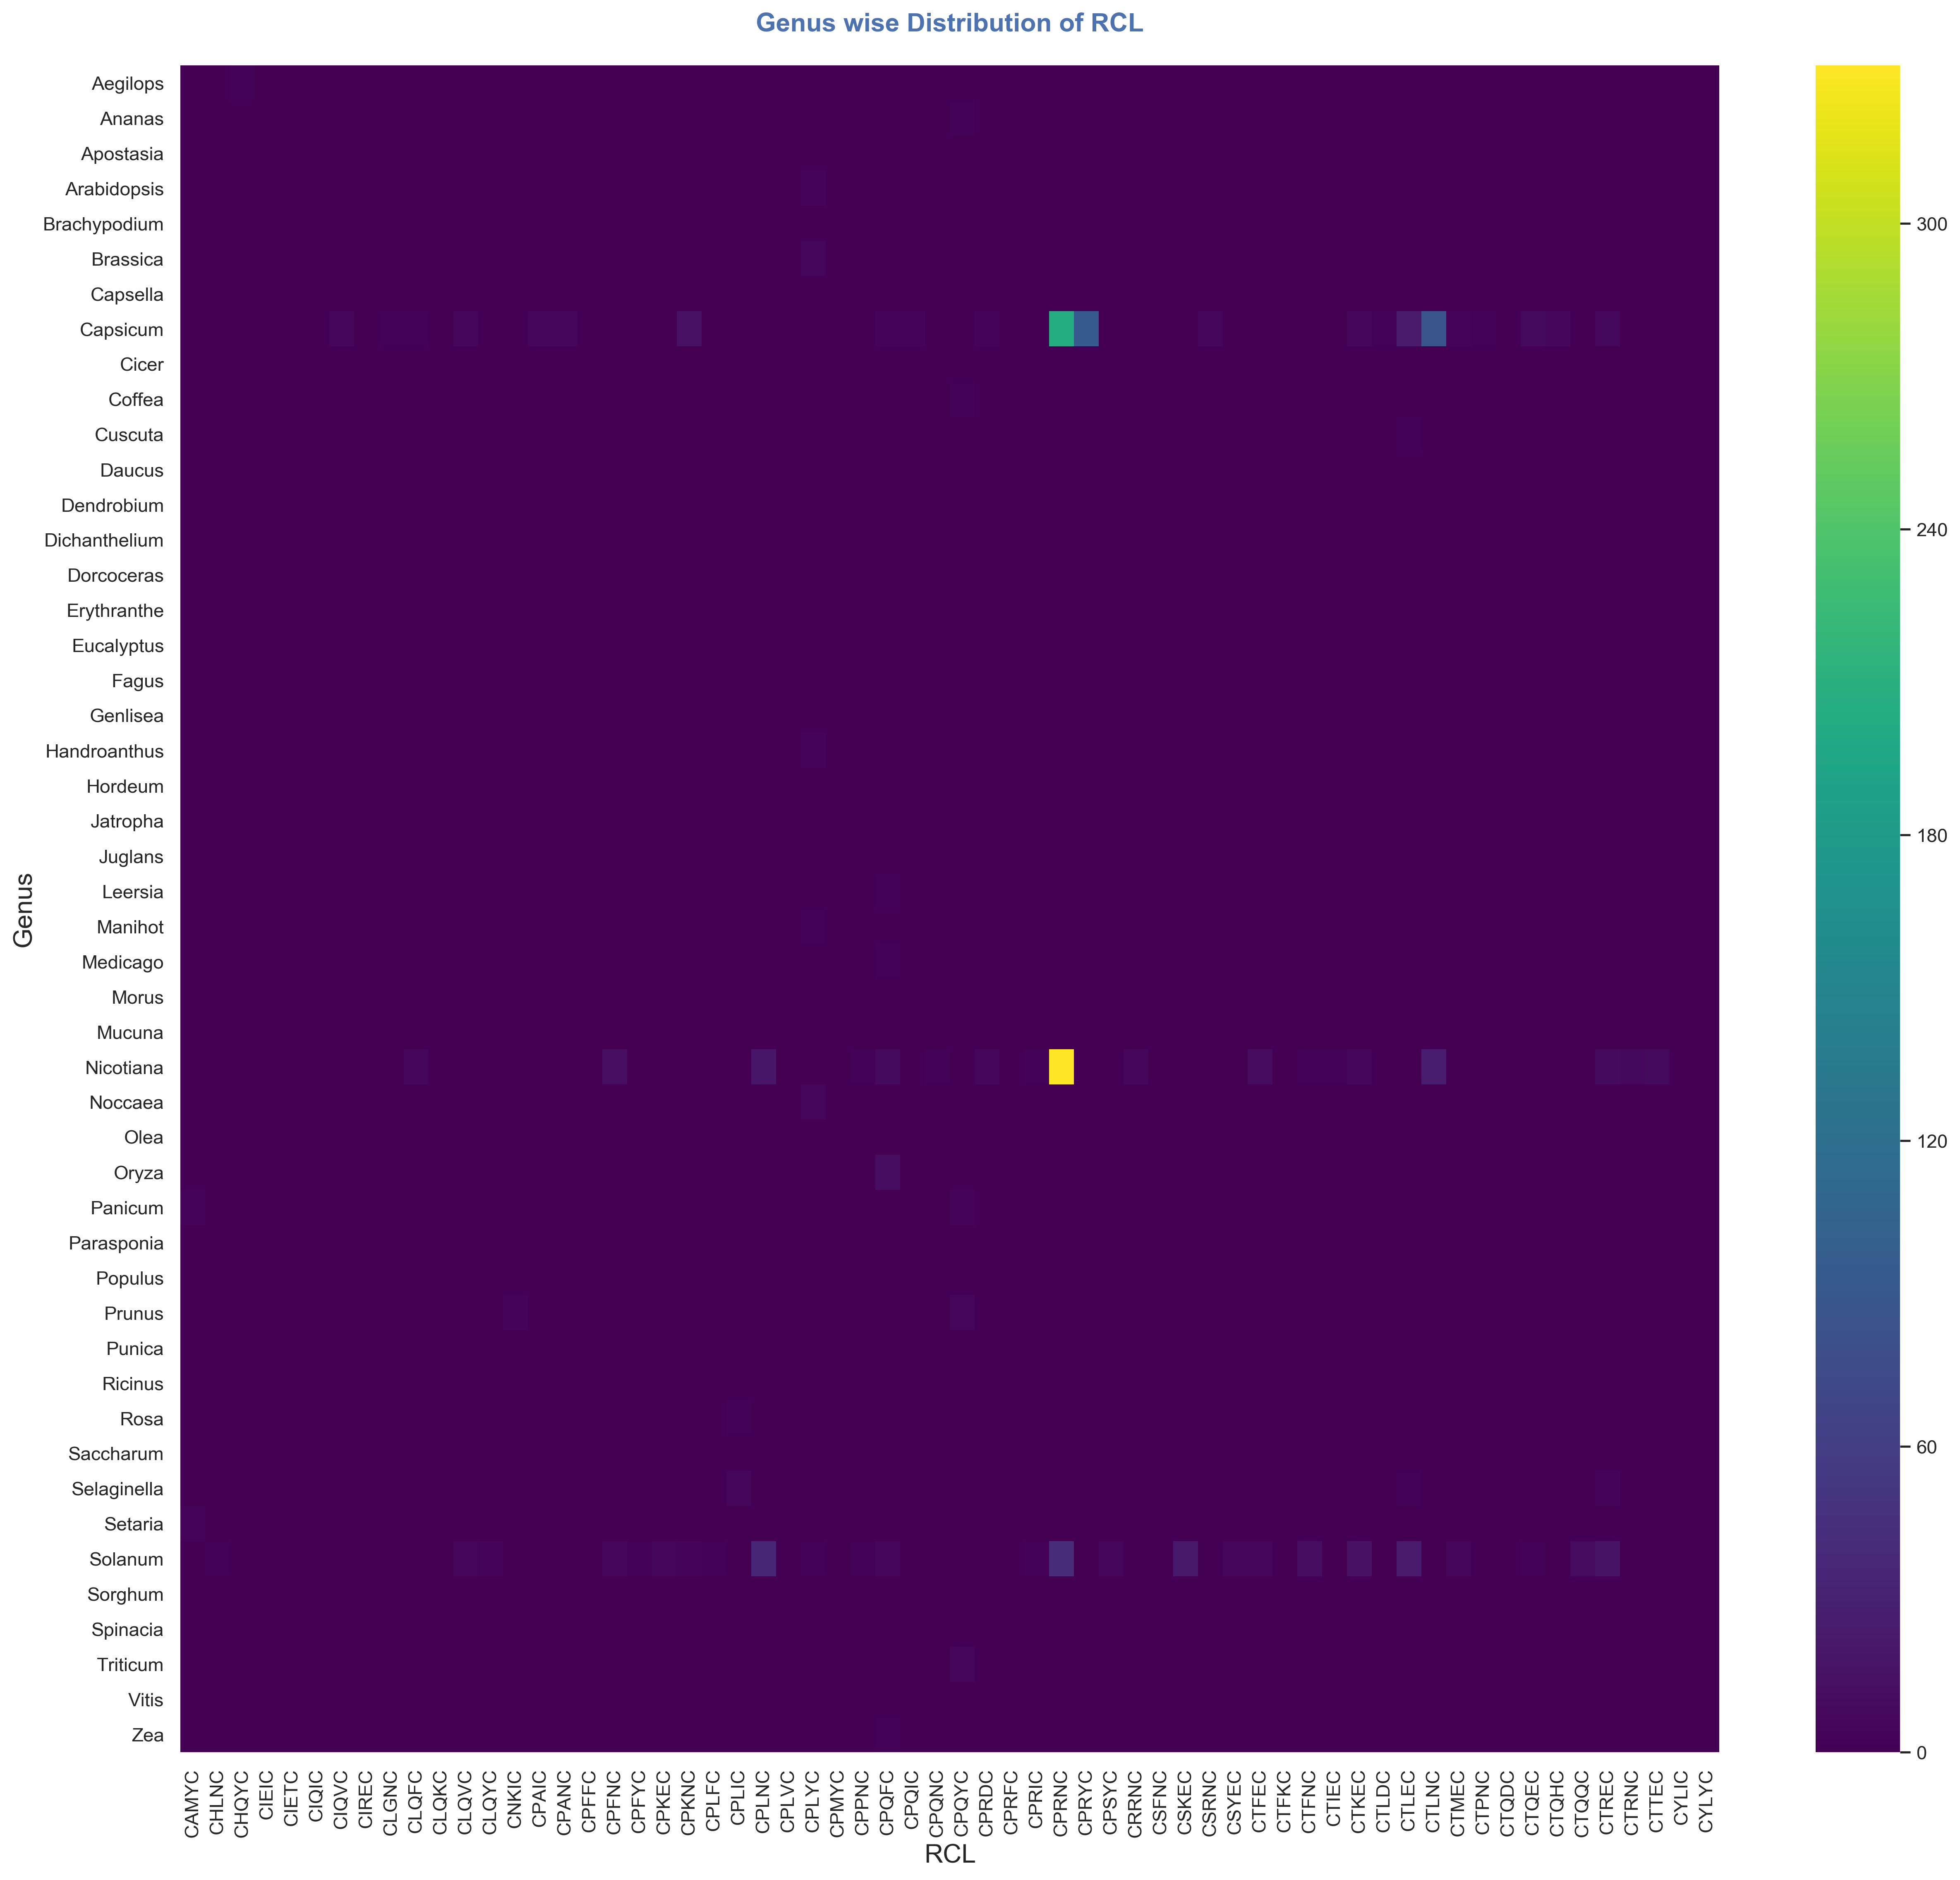

In [33]:
plt.figure(figsize=(20,18),dpi=300)
plt.title('Genus wise Distribution of RCL',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('RCL',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})

sns.heatmap(genus_rcl_pivot,cmap='viridis')

### (3.4) RCL distribution across Capsicum,Nicotiana, and Solanum

In [34]:
# Here we display the distribution of RCL across Capsicum, Nicotiana and Solanum Genus.This information can be retrieved 
# finding RCL Frequency in Genus using Tables Sequence_Domains,Taxonomy and Domains.

In [35]:
genus_rcl.Genus.unique()

array(['Aegilops', 'Ananas', 'Apostasia', 'Arabidopsis', 'Brachypodium',
       'Brassica', 'Capsella', 'Capsicum', 'Cicer', 'Coffea', 'Cuscuta',
       'Daucus', 'Dendrobium', 'Dichanthelium', 'Dorcoceras',
       'Erythranthe', 'Eucalyptus', 'Fagus', 'Genlisea', 'Handroanthus',
       'Hordeum', 'Jatropha', 'Juglans', 'Leersia', 'Manihot', 'Medicago',
       'Morus', 'Mucuna', 'Nicotiana', 'Noccaea', 'Olea', 'Oryza',
       'Panicum', 'Parasponia', 'Populus', 'Prunus', 'Punica', 'Ricinus',
       'Rosa', 'Saccharum', 'Selaginella', 'Setaria', 'Solanum',
       'Sorghum', 'Spinacia', 'Triticum', 'Vitis', 'Zea'], dtype=object)

In [36]:
genus_rcl_selected=genus_rcl.loc[genus_rcl.Genus.isin(['Capsicum','Nicotiana','Solanum']),:]

In [37]:
genus_rcl_selected

Genus    RCL  Occurrences
8     Capsicum  CPRNC          203
9     Capsicum  CPRYC           94
10    Capsicum  CTLNC           86
11    Capsicum  CTLEC           24
12    Capsicum  CPKNC           14
13    Capsicum  CTQEC            8
14    Capsicum  CTREC            7
15    Capsicum  CTKEC            6
16    Capsicum  CTQHC            6
17    Capsicum  CPAIC            5
18    Capsicum  CPANC            5
19    Capsicum  CSRNC            5
20    Capsicum  CIQVC            4
21    Capsicum  CLQVC            4
22    Capsicum  CPQFC            3
23    Capsicum  CPQIC            3
24    Capsicum  CPRDC            3
25    Capsicum  CTMEC            3
26    Capsicum  CLGNC            2
27    Capsicum  CLQFC            2
28    Capsicum  CTLDC            2
29    Capsicum  CTPNC            2
58   Nicotiana  CPRNC          331
59   Nicotiana  CTLNC           27
60   Nicotiana  CPLNC           19
61   Nicotiana  CPFNC           12
62   Nicotiana  CTFEC           10
63   Nicotiana  CPQFC            8
64   Nicotiana  CTREC            8
65   Nicotiana  CTTEC            8
66   Nicotiana  CTRNC            7
67   Nicotiana  CLQFC            4
68   Nicotiana  CPRDC            4
69   Nicotiana  CRRNC            4
70   Nicotiana  CTKEC            4
71   Nicotiana  CPPNC            2
72   Nicotiana  CPQNC            2
73   Nicotiana  CPRIC            2
74   Nicotiana  CTFNC            2
75   Nicotiana  CTIEC            2
76   Nicotiana  CLQKC            1
77   Nicotiana  CSFNC            1
78   Nicotiana  CTQDC            1
102    Solanum  CPRNC           41
103    Solanum  CPLNC           36
104    Solanum  CTLEC           24
105    Solanum  CSKEC           21
106    Solanum  CTREC           16
107    Solanum  CTKEC           15
108    Solanum  CTFNC           11
109    Solanum  CTQQC           10
110    Solanum  CLQVC            4
111    Solanum  CPFNC            4
112    Solanum  CPKEC            4
113    Solanum  CPQFC            4
114    Solanum  CPSYC            4
115    Solanum  CSYEC            4
116    Solanum  CTFEC            4
117    Solanum  CTMEC            4
118    Solanum  CLQYC            3
119    Solanum  CPKNC            3
120    Solanum  CHLNC            2
121    Solanum  CPFYC            2
122    Solanum  CPLFC            2
123    Solanum  CPLYC            2
124    Solanum  CPPNC            2
125    Solanum  CPRIC            2
126    Solanum  CTQEC            2
127    Solanum  CIREC            1
128    Solanum  CTRNC            1

In [38]:
genus_rcl_selected_pivot=pd.pivot_table(data=genus_rcl_selected,index='Genus',columns='RCL',values='Occurrences',aggfunc=sum,fill_value=0)

In [39]:
genus_rcl_selected_pivot

RCL        CHLNC  CIQVC  CIREC  CLGNC  CLQFC  CLQKC  CLQVC  CLQYC  CPAIC  \
Genus                                                                      
Capsicum       0      4      0      2      2      0      4      0      5   
Nicotiana      0      0      0      0      4      1      0      0      0   
Solanum        2      0      1      0      0      0      4      3      0   

RCL        CPANC  CPFNC  CPFYC  CPKEC  CPKNC  CPLFC  CPLNC  CPLYC  CPPNC  \
Genus                                                                      
Capsicum       5      0      0      0     14      0      0      0      0   
Nicotiana      0     12      0      0      0      0     19      0      2   
Solanum        0      4      2      4      3      2     36      2      2   

RCL        CPQFC  CPQIC  CPQNC  CPRDC  CPRIC  CPRNC  CPRYC  CPSYC  CRRNC  \
Genus                                                                      
Capsicum       3      3      0      3      0    203     94      0      0   
Nicotiana      8      0      2      4      2    331      0      0      4   
Solanum        4      0      0      0      2     41      0      4      0   

RCL        CSFNC  CSKEC  CSRNC  CSYEC  CTFEC  CTFNC  CTIEC  CTKEC  CTLDC  \
Genus                                                                      
Capsicum       0      0      5      0      0      0      0      6      2   
Nicotiana      1      0      0      0     10      2      2      4      0   
Solanum        0     21      0      4      4     11      0     15      0   

RCL        CTLEC  CTLNC  CTMEC  CTPNC  CTQDC  CTQEC  CTQHC  CTQQC  CTREC  \
Genus                                                                      
Capsicum      24     86      3      2      0      8      6      0      7   
Nicotiana      0     27      0      0      1      0      0      0      8   
Solanum       24      0      4      0      0      2      0     10     16   

RCL        CTRNC  CTTEC  
Genus                    
Capsicum       0      0  
Nicotiana      7      8  
Solanum        1      0

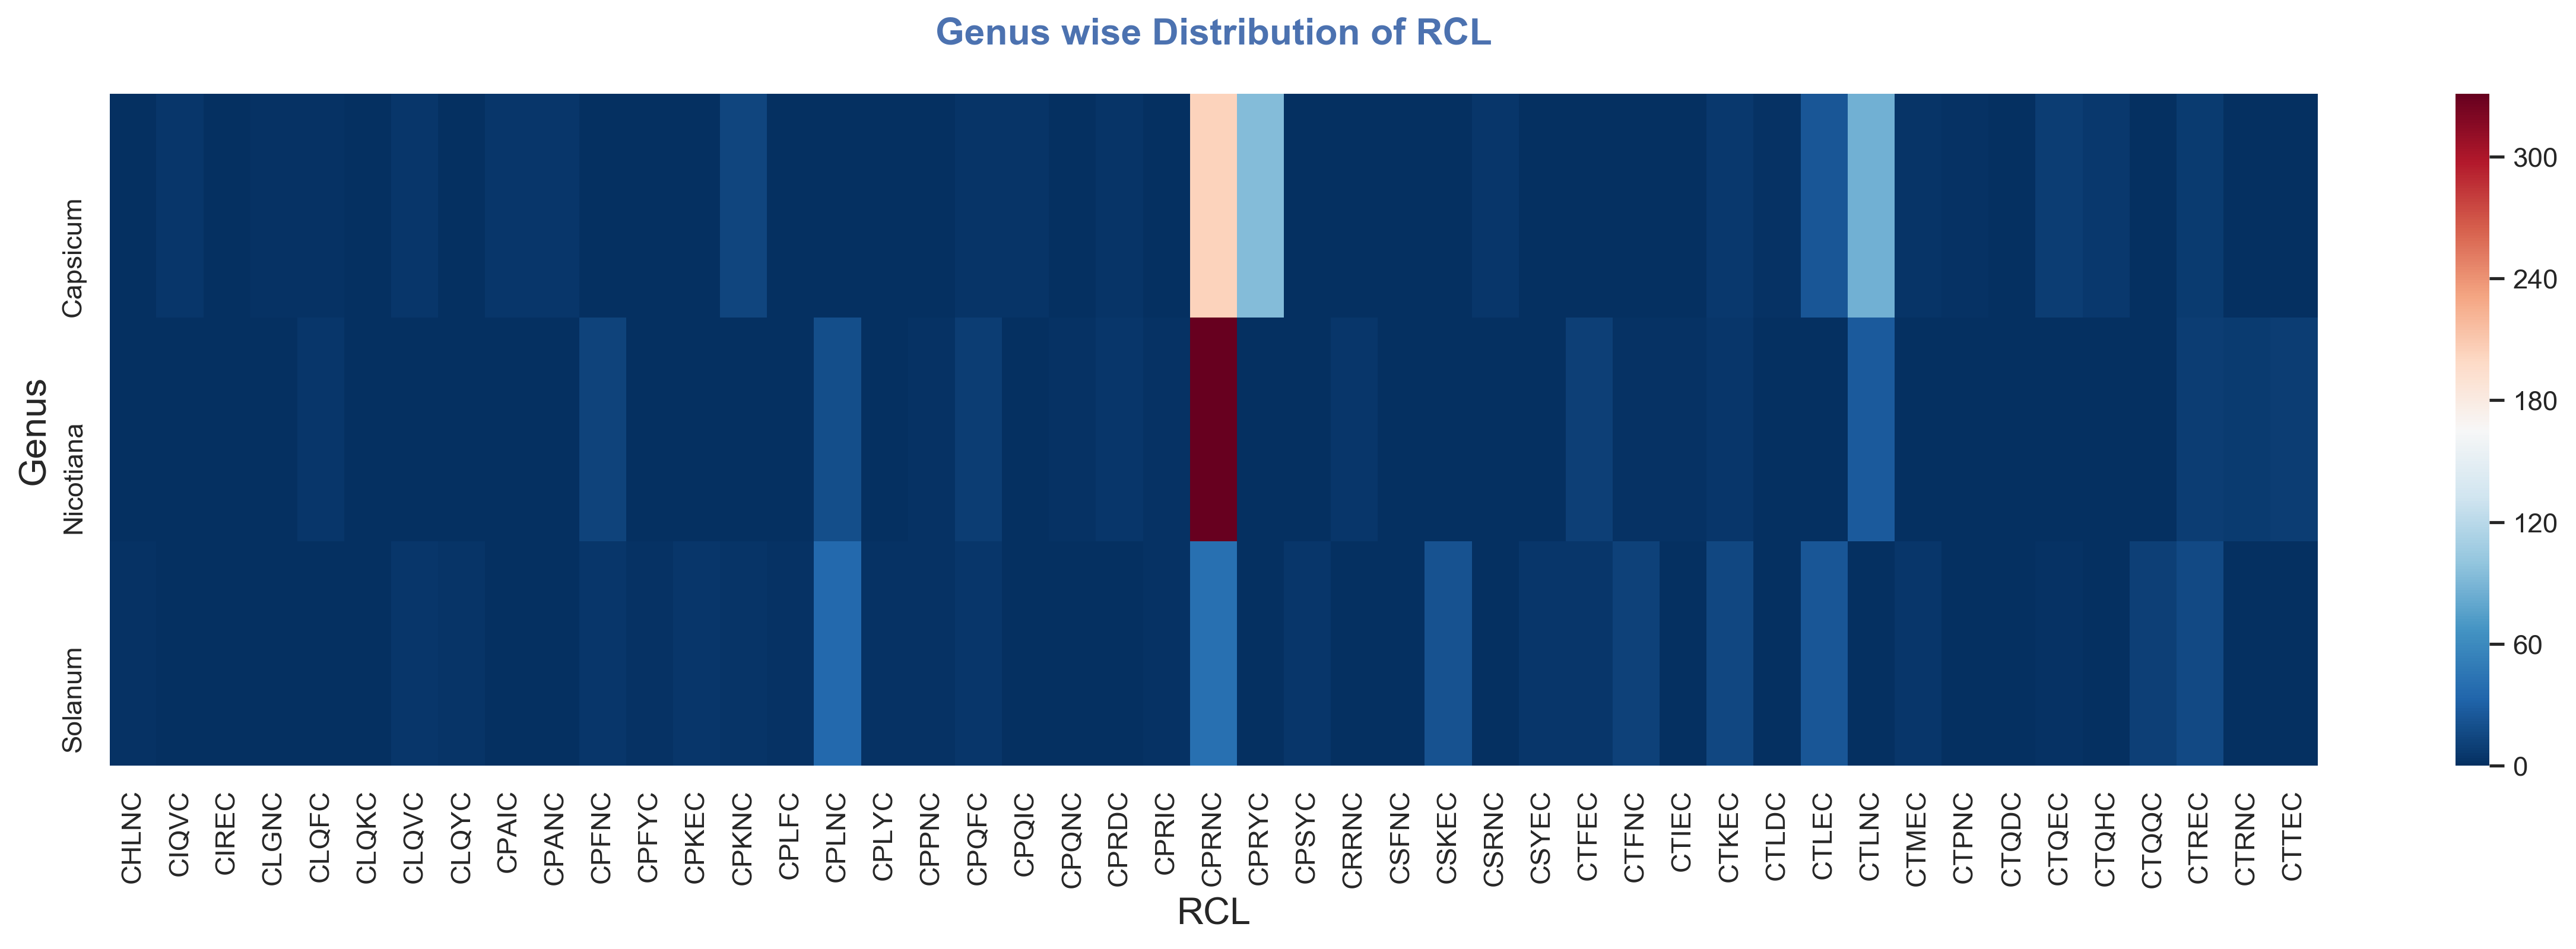

In [40]:
plt.figure(figsize=(20,5),dpi=300)
plt.title('Genus wise Distribution of RCL',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('RCL',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})

sns.heatmap(genus_rcl_selected_pivot,cmap='RdBu_r')

In [ ]:
### (3.4) RCL distribution across Capsicum,Nicotiana, and Solanum